In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
from sklearn.linear_model import LinearRegression
import os
import warnings
warnings.filterwarnings('ignore')

# **New Manager Myth?** 
## The Effect of a Managerial Change on a Team's Performance in the Premier League

# Contributors

- Hanzhong "Clark" Yang
- Erich Then
- Kabir Shergill
- Tianqi "TQ" Zhang

# Abstract/Overview
The overall purpose of this project was to determine whether teams in the EPL saw genuine bumps in performance in the short term after bringing in a new manager. To do this, we looked at various match statistics and changes in manager for teams in the EPL since 2017. During the exploration phase, we primarily focused on teasing out how our match metrics were distributed, and how they changed over the time period (~2017 to 2022). At the end of this phase, we ultimately hit-up on the metrics that had the most positive and negative effects on the result of the game. In our final analysis, we checked if the first ten games of each newcomer exhibited an increase in performance as compared to their predecessor's entire term. Our results told us that only a very small proportion (~2%) of changes correlated with an increase in performance. Thus, we could not find substantial evidence in our dataset to support the claim that a change in manager causes a bump in short-term performance.

# Research Question

**In the English Premier League, does a managerial change postively affect a team's performance in the next ten games in terms of win/loss ratio, points per game, and shots per quantity of possession, among various other metrics?** 

One subquestion we could possibly explore is if teams play more aggresively for a new manager, measured in terms of fouls committed,  tackles attempted, and cards accumulated.


## Background and Prior Work

There is a common sentiment among Premier League pundits, fans, and players alike that firing the current manager of any given team and hiring another one, in and of itself, is enough to re-invigorate the existing crop of players and give them a significant short-term performance boost. This concept is widely referred to as the “new manager bounce.” But is this simply a myth propagated to make us fans feel better about the team, or is it grounded in some sort of statistical truth? In this research project, we will attempt to answer exactly this question and a couple other ones that pertain to the same topic, most notably: Do teams also change their play style to something more aggressive and rash with a new manager in charge? 

In terms of prior work, we wanted to find both research already done investigating “the bounce” specifically, as well as broader research done on metrics that can be used to quantify “positive” team performance that goes beyond “points per match” and win/loss/draw ratios. While those two are perfectly viable metrics that we will utilize, if we want to ask more in-depth questions about how a team changes the way it plays under a new manager, then it would be useful to look into more granular statistics. For “the bounce” in general, Soham Mukherjee at the “goal.com,” found that in the four seasons that came after the beginning of 2017/18, 20 out of the 26 managerial changes that took place saw the new man average “more points per match (ppm) in his first five matches in charge than his predecessor.”<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) And in nine of those cases, the new man increased the ppm by a factor of two or more. 

On the other hand, Ben McAleer at The Guardian is more skeptical of “the bounce,” saying that any improvement after a change is mostly due to the fact that things cannot “get any worse.”<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) However, even he is forced to concede that in the 2020/21 seasons, all four teams that changed their manager “went on to win more points per game.” The offensive performance is analyzed in this article through the metrics of points earned throughout the rest of the season, specifically looking at the average points gained per game  as well as games won and the magnitude and nature of these wins (penalties? Blowout? Close game? Extra time?, etc). It is also important to note, as mentioned in this article, that the initial positioning and stats, such as points per game, rankings, etc. at the time of the manager switch have a very large influence on the success of the new manager. This makes sense, as the state of the team undergoing the manager switch (which is usually not optimal) will be a large influence on the supposed success a new manager brings. This can be a benefit for the manager stepping in, as in most cases the team is not in good form, making an uphill turn pretty feasible, as mentioned by McAleer in this article: “New managers often look more effective because they are starting from a low base. For the most part, a manager is sacked when the team is playing poorly”. 

Thus, it is also important to examine the actual state of the change of managers; Was it a sack of the manager, voluntary step down, or something else? The effect of how the manager transition took place on the performance of the club can be analyzed using the metrics of scoring, points per game, approval ratings, as well as team budget and spending, and more. This can, and should, be analyzed in both a short term (~5 or so games) and long term (through the end of the season, offseason, and beginning of the new season) scope. We will be focusing on more of a medium term range, that being the span of ten games after the transition. 

It is also important to determine a measure for "success". While the above articles suggested win rate and goals/points per game as suitable metrics, we wanted to not only measure the results, but performance overall. Serafeim Moustakidis and colleagues have used Explainable AI to determine which team-level performance metrics contributed the most to the results of a soccer match.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) They analyzed 160 different variables, averaged throughout a season and scaled. They used feature selection to train machine learning models on these variables, then evaluate their performance on a test set. The "result" that the models were trying to predict was defined as the average scoring performance over the season. Moustakidis and colleagues concluded that 14 of the variables they tested significantly affected a team's results, including variables describing the ability to create chances for goals, passing, and aggressiveness. This paper gives us a number of metrics that we can use to measure a team's performance in addition to their results, allowing us to properly analyze the full effect of a managerial change on a soccer team.

Overall, while there have been articles written in popular journals on the topic, none go in-depth to analyze a team's performance, and focus too broadly on the results. We intend to analyze the data available to not only look for an uptick in results after a managerial change, but also what other factors might be affected that could attribute to those results.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Mukherjee, Soham (30 Jan 2023) What is 'new manager bounce' in football? *Goal.com*. https://www.goal.com/en-us/news/what-is-new-manager-bounce-in-football/blt73eb2750d6754abc
2. <a name="cite_note-2"></a> [^](#cite_ref-2) McAleer, Ben (25 Nov 2021) Investigating the new manager bounce in the Premier League. *The Guardian*. https://www.theguardian.com/football/who-scored-blog/2021/nov/25/investigating-new-manager-bounce-premier-league
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Moustakidis, Serafeim et. al. (May 2023). Predicting Football Team Performance with Explainable AI: Leveraging SHAP to Identify Key Team-Level Performance Metrics. *Future Internet*. 15. 174. 10.3390/fi15050174. 


# Hypothesis


**We expect that a change in manager will lead, in the short term, to a team increasing the points per game, creating more chances, and overall increasing their offensive output.** This is because we believe that when a new manager comes in, the teams plays more aggressively in terms of measurements such as fouls committed, cards earned, tackles/interceptions, and other such metrics.

# Data

## Data overview

Each dataset includes the following information:
- Dataset #1
  - Dataset Name: English Premier League Match Stats
  - Link to the dataset: https://www.kaggle.com/datasets/saife245/english-premier-league?select=final_dataset.csv
  - Number of observations: 8020
  - Number of variables: 40 total (with 18 relevant)
- Dataset #2
  - Dataset Name: Managerial Changes
  - Link to the dataset: https://www.transfermarkt.us/premier-league/trainerwechsel/wettbewerb/GB1/plus/?saison_id=1992
  - Number of observations: 410
  - Number of variables: 14
  
- Dataset #3
  - Dataset Name: Web-Scraped Passing data for each team per-match. 
  - Link to the dataset: https://fbref.com/en/comps/9/Premier-League-Stats
  - Number of observations: Roughly 2805
  - Number of variables: 3 (Pass completion%, team, and date)

The first dataset was downloaded from kaggle, where the uploader retrieved it from [footystats.org](https://footystats.org/england/premier-league). It includes metrics collected from matches in the Premier League from 2000 to 2022. Each observation corresponds to a single match. It contains a lot of statistics, ranging from goals scored, shots taken, to more abstract betting odds data the home and away teams for each match. The relevant variables included goals scored, match result, shots, shots on target, fouls committed, corners, and red/yellow cards earned. This dataset came pretty cleaned already, but we needed to increase the granularity, ensuring we have one row for each team for each match, not just one row per match.
 - For this data set, our relevant/top variables are:
     - Shots: all attempted shots	
     - ShotsOnTarget: shots that met the goal in some capacity (woodwork doesn't count)	
     - FoulsCommited	
     - Corners 	
     - YellowCardsEarned 	
     - RedCardsEarned 	
     - IsHome 	
     - Won
     - goal_acc (derived metric)
     - PointsWonByResult (derived metric)

The second dataset was scraped from the website [transfermarkt.us](https://www.transfermarkt.us/premier-league/trainerwechsel/wettbewerb/GB1/plus/?saison_id=1992). It includes the data on managerial changes for each team in the Premier League. Each observation corresponds to a manager, and it includes data such as the manager's successor, the date they left, and their first/last match as manager.
- We are just using this dataset for a timeline of succession for each manager for as many clubs as we can.


The third dataset was scraped from the website [fbref.com](https://fbref.com/en/comps/9/Premier-League-Stats). The website includes passing completion data for each club in the premier league on a season-by-season, match-by-match basis. We scraped the passing completion percentage column for each match a team played across as many clubs as the data was available (stretching back to the 2017 season).

We plan to combine these by date, finding out which manager was managing each team for each match. This will allow us to see between which matches there was a change in leadership, and to graph each team's performance over time by manager.

# Data Cleaning
Below, we begin our data cleaning process to prep our data for analysis.

**Main Goals**
- Increase granularity: Get one observation per team per match
    - Each match has 2 rows, one for the stats for each team
    - add column: Home/away
- Remove data from before 2017


##### Cleaning passing_data to set it up for a merge into data_full df

**1. Match date format to the metrics csv**

In [2]:
passing_data = pd.read_csv("data/passing_data.csv")
passing_data['Date'] = pd.to_datetime(passing_data['Date']).dt.strftime('%d/%m/%y')
passing_data.head()

,Date,Team,Passing Cmp%
0,11/08/17,Arsenal,83.0
1,19/08/17,Arsenal,85.9
2,27/08/17,Arsenal,80.4
3,09/09/17,Arsenal,78.8
4,17/09/17,Arsenal,78.4


**2. I want to rename the column to Pass Completion, and add a percent to the end of each value**

In [3]:
passing_data.rename(columns={'Passing Cmp%': 'Pass Cmp'}, inplace=True)

#undo multiple percents from multiple runs
#passing_data['Pass Completion'] = passing_data['Pass Completion'].str.rstrip('%') + '%'
#prevent
passing_data['Pass Cmp'] = passing_data['Pass Cmp'].apply(lambda x: f"{x}%" if not str(x).endswith('%') else x)
passing_data.head(5)

,Date,Team,Pass Cmp
0,11/08/17,Arsenal,83.0%
1,19/08/17,Arsenal,85.9%
2,27/08/17,Arsenal,80.4%
3,09/09/17,Arsenal,78.8%
4,17/09/17,Arsenal,78.4%


**3.Create a copy dataframe of passing_data for safekeeping, match team names in passing_data to those in the metrics df**

In [4]:
passing_data_copy = passing_data.copy()

#typo lol
passing_data['Team'] = passing_data['Team'].replace({'Leiceste': 'Leicester'})

team_name_mapping = {
    'Manchester City': 'Man City',
    'Brighton & Hove Albion': 'Brighton',
    'Manchester United': 'Man United',
    'Newcastle United': 'Newcastle',
    'West Ham United': 'West Ham',
    'Wolverhampton Wanderers': 'Wolves'
}

passing_data['Team'] = passing_data['Team'].replace(team_name_mapping)
#print(passing_data['Team'].unique())
#passing_data.head(5)



**This looks better, this is now ready for the merge. I will do this later in the file when I know the data_full df is cleaned.**

In [5]:
dfs = []
for filename in os.listdir('data/Datasets'):
    if (filename == '.ipynb_checkpoints'):
        continue
    else:
        data_fp = Path('data/Datasets') / filename
        dfs.append(pd.read_csv(data_fp))
        data = pd.concat(dfs).reset_index(drop=True)
data.shape

(8020, 144)

In [6]:
to_drop = ['Referee', 
            'HTHG', # dropping half time stuff
            'HTAG', 
            'Div', 
            'HTR']
maybe_drop = ['Attendance',
                'HO',
                'AO', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
        'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA',
        'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5',
        'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA',
        'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA',
        'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA',
        'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD',
        'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5',
        'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh',
        'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA',
        'AvgCAHH', 'AvgCAHA', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'Time', 'LBH',
       'LBD', 'LBA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA',
       'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH',
       'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'SJH', 'SJD',
       'SJA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'HHW', 'AHW', 'SBH',
       'SBD', 'SBA']

data = data.drop(columns=to_drop)
for col in maybe_drop:
    try:
        data = data.drop(columns=[col])
    except KeyError:
        continue

In [7]:
data.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS',
       'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

AHW/HHW = Hit Woodwork: hit crossbar/goalpost

- NOT included in Shots on Target

It looks like all the columns that start with `H` are home, and the columns that start with `A` are away
- exceptions: FTHG = Home team goals, FTAG = Away team goals, HTHG = half time home goals
    - The date, time, div, etc. are also obviously the same for home and away

In [8]:
is_away = data.columns.str[0] == 'A'
is_home = data.columns.str[0] == 'H' # necessary, since there are exception
away_cols = data.columns[is_away]
home_cols = data.columns[is_home]
away_cols.size == home_cols.size

True

In [9]:
away_df = pd.concat(
    [
        data.loc[:,['Date', 'FTAG', 'FTR']],
        data[away_cols]
    ],
    axis=1
)
home_df = pd.concat(
    [
        data.loc[:,['Date', 'FTHG', 'FTR']],
        data[home_cols]
    ],
    axis=1
)

In [10]:
away_df.head()

,Date,FTAG,FTR,AwayTeam,AS,AST,AF,AC,AY,AR
0,13/08/16,1,A,Swansea,17,9,14,4,2,0
1,13/08/16,1,A,West Brom,13,3,15,6,2,0
2,13/08/16,1,D,Tottenham,13,4,14,6,0,0
3,13/08/16,1,H,Leicester,18,5,17,3,2,0
4,13/08/16,1,H,Sunderland,7,3,14,6,2,0


In [11]:
home_df.head()

,Date,FTHG,FTR,HomeTeam,HS,HST,HF,HC,HY,HR
0,13/08/16,0,A,Burnley,10,3,10,7,3,0
1,13/08/16,0,A,Crystal Palace,14,4,12,3,2,0
2,13/08/16,1,D,Everton,12,6,10,5,0,0
3,13/08/16,2,H,Hull,14,5,8,5,2,0
4,13/08/16,2,H,Man City,16,4,11,9,1,0


In [12]:
print(home_df.shape)
print(away_df.shape)
print(data.shape)

(8020, 10)
(8020, 10)
(8020, 18)


Let's add one final column to both dataframes: a column to tell if the team is home or away.

In [13]:
away_df['IsHome'] = [False] * away_df.shape[0]
away_df.head(3)

,Date,FTAG,FTR,AwayTeam,AS,AST,AF,AC,AY,AR,IsHome
0,13/08/16,1,A,Swansea,17,9,14,4,2,0,False
1,13/08/16,1,A,West Brom,13,3,15,6,2,0,False
2,13/08/16,1,D,Tottenham,13,4,14,6,0,0,False


In [14]:
home_df['IsHome'] = [True] * home_df.shape[0]
home_df.head(3)

,Date,FTHG,FTR,HomeTeam,HS,HST,HF,HC,HY,HR,IsHome
0,13/08/16,0,A,Burnley,10,3,10,7,3,0,True
1,13/08/16,0,A,Crystal Palace,14,4,12,3,2,0,True
2,13/08/16,1,D,Everton,12,6,10,5,0,0,True


Our ultimate goal is to run a `pd.concat()` on both to combine them into one df with twice the rows of the original. To combine these, they'll have to have the same column names.

Since the distinction for everything but the first few columns and '**FTHG/FTAG**' is the first letters, let's just drop it from every column name.
'AT' for away team, and 'HT' for home team.

In [15]:
away_df.head(3)

,Date,FTAG,FTR,AwayTeam,AS,AST,AF,AC,AY,AR,IsHome
0,13/08/16,1,A,Swansea,17,9,14,4,2,0,False
1,13/08/16,1,A,West Brom,13,3,15,6,2,0,False
2,13/08/16,1,D,Tottenham,13,4,14,6,0,0,False


In [16]:
away_df.columns

Index(['Date', 'FTAG', 'FTR', 'AwayTeam', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR',
       'IsHome'],
      dtype='object')

In [17]:
# we'll work with away first
fixed_away_cols = (away_df
                   .columns
                   .str.replace('Away', '')
                   .str.replace('A', ''))
away_df.columns = fixed_away_cols
away_df.head(3)

,Date,FTG,FTR,Team,S,ST,F,C,Y,R,IsHome
0,13/08/16,1,A,Swansea,17,9,14,4,2,0,False
1,13/08/16,1,A,West Brom,13,3,15,6,2,0,False
2,13/08/16,1,D,Tottenham,13,4,14,6,0,0,False


In [18]:
home_df.columns

Index(['Date', 'FTHG', 'FTR', 'HomeTeam', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR',
       'IsHome'],
      dtype='object')

In [19]:
# same thing with home
fixed_home_cols = (home_df
                   .columns
                   .str.replace('HomeTeam', 'Team') # just so we dont delete "IsHome"
                   .str.replace('FTHG', 'FTG')
                   .str.replace('HS', 'S')
                   .str.replace('HST', 'ST')
                   .str.replace('HHW', 'HW')
                   .str.replace('HC','C')
                   .str.replace('HF', 'F')
                   .str.replace('HY', 'Y')
                   .str.replace('HR', 'R'))
home_df.columns = fixed_home_cols
home_df.head(3)

,Date,FTG,FTR,Team,S,ST,F,C,Y,R,IsHome
0,13/08/16,0,A,Burnley,10,3,10,7,3,0,True
1,13/08/16,0,A,Crystal Palace,14,4,12,3,2,0,True
2,13/08/16,1,D,Everton,12,6,10,5,0,0,True


In [20]:
(home_df.columns == away_df.columns).all()

True

Yippee!! Let's concatenate them both into one dataframe, to make it easier to work with.

In [21]:
data_full = pd.concat([away_df, home_df])
data_full.shape
data_full.shape[0] == data.shape[0] * 2

True

We have some weird, undescriptive column names right now, so let's replace those

In [22]:
data_full.columns

Index(['Date', 'FTG', 'FTR', 'Team', 'S', 'ST', 'F', 'C', 'Y', 'R', 'IsHome'], dtype='object')

In [23]:
better_col_names = {
    'FTR': 'FullTimeResult',
    'FTG': 'TotalGoalsScored',
    'S': 'Shots',
    'ST': 'ShotsOnTarget',
    'HW': 'HitWoodwork',
    'C': 'Corners',
    'F': 'FoulsCommited',
    'Y': 'YellowCardsEarned',
    'R': 'RedCardsEarned'
}
data_full.rename(columns=better_col_names, inplace=True)
data_full.sort_values('TotalGoalsScored').head(10)

,Date,TotalGoalsScored,FullTimeResult,Team,Shots,ShotsOnTarget,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,IsHome
7394,03/12/11,0,H,Bolton,13,9,5,6,2,1,False
792,04/10/2020,0,A,Leicester,4,0,11,6,2,0,True
3882,19/10/2019,0,D,Bournemouth,11,2,8,6,1,0,True
3420,19/08/00,0,H,Man City,8,4,12,6,2,0,False
786,28/09/2020,0,A,Fulham,16,3,18,5,6,0,True
3887,19/10/2019,0,A,Crystal Palace,7,2,8,1,1,0,True
782,27/09/2020,0,A,Sheffield United,14,4,18,5,2,0,True
6083,15/11/08,0,H,Stoke,3,1,15,0,2,0,False
3890,25/10/2019,0,A,Southampton,6,3,3,2,0,1,True
3893,26/10/2019,0,D,Watford,7,3,14,5,5,0,True


Much better, and much easier to work with.

Let's add a column to see if the team won or not (draws are marked as NaN for now)

In [24]:
data_full['Won'] = data_full.apply(
    lambda row: np.NaN if row['FullTimeResult'] == 'D' else (row['FullTimeResult'] == 'H') == (row['IsHome']),
    axis=1
)
data_full.head()

,Date,TotalGoalsScored,FullTimeResult,Team,Shots,ShotsOnTarget,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,IsHome,Won
0,13/08/16,1,A,Swansea,17,9,14,4,2,0,False,True
1,13/08/16,1,A,West Brom,13,3,15,6,2,0,False,True
2,13/08/16,1,D,Tottenham,13,4,14,6,0,0,False,NaN
3,13/08/16,1,H,Leicester,18,5,17,3,2,0,False,False
4,13/08/16,1,H,Sunderland,7,3,14,6,2,0,False,False


In [25]:
data_full['FullTimeResult'].value_counts()

H    7334
A    4662
D    4044
Name: FullTimeResult, dtype: int64

In [26]:
data_full.shape

(16040, 12)

In [27]:
after_2017 = pd.to_datetime(data_full['Date']).dt.year >= 2017
data_full = data_full[after_2017].copy()
# data_full = pd.merge(data_full, passing_data_df[['Date', 'Team', 'Pass Cmp']], 
#                      on=['Date', 'Team'], 
#                      how='left')

data_full

,Date,TotalGoalsScored,FullTimeResult,Team,Shots,ShotsOnTarget,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,IsHome,Won
188,01/01/17,0,H,Crystal Palace,7,4,7,4,1,0,False,False
189,01/01/17,4,A,Tottenham,19,6,6,3,0,0,False,True
190,02/01/17,0,H,Southampton,12,3,14,8,1,0,False,False
191,02/01/17,1,H,Burnley,11,3,11,8,3,0,False,False
192,02/01/17,0,D,Leicester,10,4,9,2,0,0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,08/12/18,0,A,Leicester,11,3,12,6,3,0,True,False
6496,08/12/18,4,H,Man United,20,11,11,10,1,0,True,True
6497,08/12/18,3,H,West Ham,13,6,10,5,1,0,True,True
6498,09/12/18,1,A,Newcastle,12,4,10,4,2,1,True,False


### Managerial Changes dataset cleaning

In [28]:
managerial_changes = pd.read_csv('data/managerial_changes.csv')

In [29]:
managerial_changes.loc[managerial_changes['club'] == 'Manchester United']

,club,Coach,Matchday,Rank,PPG,last_match,last_match_teams_rank,Leaving date,Days in charge,Successor,Rank1,PPG1,first_match,year
225,Manchester United,Sir Alex Ferguson,38,1,2.34,West Bromwich Albion 5:5 Manchester United,5:5,"Jun 30, 2013",9733.0,David Moyes,-,-,West Bromwich Albion Manchester United,2012
239,Manchester United,David Moyes,35,7,1.68,Everton FC 2:0 Manchester United,2:0,"Apr 22, 2014",295.0,Louis van Gaal,-,-,Everton FC Manchester United,2013
276,Manchester United,Louis van Gaal,38,5,1.74,Crystal Palace 1:2 Manchester United,1:2,"May 23, 2016",679.0,José Mourinho,-,-,Crystal Palace Manchester United,2015
326,Manchester United,Ole Gunnar Solskjær,30,6,2.46,Wolverhampton Wanderers 2:1 Manchester United,2:1,"Mar 28, 2019",99.0,Ole Gunnar Solskjær,6,1.00,Wolverhampton Wanderers 1:5 Manchester United,2018
333,Manchester United,José Mourinho,17,6,1.53,Liverpool FC 3:1 Manchester United,3:1,"Dec 18, 2018",900.0,Ole Gunnar Solskjær,6,2.46,Liverpool FC 1:5 Manchester United,2018
362,Manchester United,Ralf Rangnick,38,6,1.54,Crystal Palace 1:0 Manchester United,1:0,"May 31, 2022",179.0,Erik ten Hag,-,-,Crystal Palace Manchester United,2021
368,Manchester United,Michael Carrick,14,7,2.00,Manchester United 3:2 Arsenal FC,3:2,"Dec 3, 2021",12.0,Ralf Rangnick,6,1.54,Manchester United 1:0 Arsenal FC,2021
369,Manchester United,Ole Gunnar Solskjær,12,8,1.42,Watford FC 4:1 Manchester United,4:1,"Nov 21, 2021",969.0,Michael Carrick,7,2.00,Watford FC 0:2 Manchester United,2021


In [30]:
managerial_changes.shape

(410, 14)

In [31]:
managerial_changes[['club', 'Coach', 'Leaving date', 'Successor']]

,club,Coach,Leaving date,Successor
0,Chelsea FC,David Webb,"Jun 30, 1993",Glenn Hoddle
1,Tottenham Hotspur,Doug Livermore,"Jun 19, 1993",Osvaldo Ardiles
2,Tottenham Hotspur,Ray Clemence,"Jun 19, 1993",Osvaldo Ardiles
3,Crystal Palace,Steve Coppell,"May 17, 1993",Alan Smith
4,Nottingham Forest,Brian Clough,"May 8, 1993",Frank Clark
...,...,...,...,...
405,Wolverhampton Wanderers,Bruno Lage,"Oct 2, 2022",Steve Davis
406,Brighton & Hove Albion,Andrew Crofts,"Sep 17, 2022",Roberto De Zerbi
407,Chelsea FC,Thomas Tuchel,"Sep 7, 2022",Graham Potter
408,Brighton & Hove Albion,Graham Potter,"Sep 7, 2022",Andrew Crofts


In [32]:
managers_cleaned = managerial_changes[['club', 'Coach', 'Leaving date', 'Successor']].copy()
managers_cleaned.columns = ['Club', 'Predecessor', 'Join date', 'Coach']
managers_cleaned[managers_cleaned['Club'] == 'Manchester United']

,Club,Predecessor,Join date,Coach
225,Manchester United,Sir Alex Ferguson,"Jun 30, 2013",David Moyes
239,Manchester United,David Moyes,"Apr 22, 2014",Louis van Gaal
276,Manchester United,Louis van Gaal,"May 23, 2016",José Mourinho
326,Manchester United,Ole Gunnar Solskjær,"Mar 28, 2019",Ole Gunnar Solskjær
333,Manchester United,José Mourinho,"Dec 18, 2018",Ole Gunnar Solskjær
362,Manchester United,Ralf Rangnick,"May 31, 2022",Erik ten Hag
368,Manchester United,Michael Carrick,"Dec 3, 2021",Ralf Rangnick
369,Manchester United,Ole Gunnar Solskjær,"Nov 21, 2021",Michael Carrick


Let's look through the data and do some checks for null values, strange values, etc.
By looking through our csv, it looks like null values are represented by '-', so we should catch that.

In [33]:
managers_cleaned = managers_cleaned.replace('-', np.NaN)

Now lets handle the missing values.

In [34]:
managers_cleaned.isna().sum()

Club           0
Predecessor    0
Join date      1
Coach          0
dtype: int64

In [35]:
# only one missing value - let's just drop it
managers_cleaned[managers_cleaned['Join date'].isna()]

,Club,Predecessor,Join date,Coach
62,Crystal Palace,Ron Noades,NaN,Jack Tresadern


In [36]:
managers_cleaned = managers_cleaned.drop(62, axis=0).reset_index(drop=True)

One problem I've noticed is that a lot of the team names don't line up between this and the metrics dataset. Let's fix that so we can more easily merge them later on.

In [37]:
np.sort(data_full['Team'].unique())

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton',
       'Fulham', 'Huddersfield', 'Hull', 'Leeds', 'Leicester',
       'Liverpool', 'Man City', 'Man United', 'Middlesbrough',
       'Newcastle', 'Norwich', 'Sheffield United', 'Southampton', 'Stoke',
       'Sunderland', 'Swansea', 'Tottenham', 'Watford', 'West Brom',
       'West Ham', 'Wolves'], dtype=object)

In [38]:
np.sort(managers_cleaned['Club'].unique())

array(['AFC Bournemouth', 'Arsenal FC', 'Aston Villa', 'Birmingham City',
       'Blackburn Rovers', 'Bolton Wanderers', 'Bradford City',
       'Brighton & Hove Albion', 'Burnley FC', 'Cardiff City',
       'Charlton Athletic', 'Chelsea FC', 'Coventry City',
       'Crystal Palace', 'Derby County', 'Everton FC', 'Fulham FC',
       'Huddersfield Town', 'Hull City', 'Ipswich Town', 'Leeds United',
       'Leicester City', 'Liverpool FC', 'Manchester City',
       'Manchester United', 'Middlesbrough FC', 'Newcastle United',
       'Norwich City', 'Nottingham Forest', 'Portsmouth FC',
       'Queens Park Rangers', 'Reading FC', 'Sheffield United',
       'Sheffield Wednesday', 'Southampton FC', 'Stoke City',
       'Sunderland AFC', 'Swansea City', 'Swindon Town',
       'Tottenham Hotspur', 'Watford FC', 'West Bromwich Albion',
       'West Ham United', 'Wigan Athletic', 'Wimbledon FC (- 2004)',
       'Wolverhampton Wanderers'], dtype=object)

In [39]:
cleaned_clubs = (managers_cleaned['Club']
                            .str.replace(' FC', '') # Step 1: no "FC" in metrics data
                            .str.replace('AFC', '') # Special case for "AFC Bournemouth"
                            .str.replace('Manchester City', 'Man *City') # Special case for man city
                            .str.replace(' City', '') # Step 2: no "City" in metrics data
                            .str.replace(' Rovers', '') # etc for all other suffixes
                            .str.replace(' Wanderers', '')
                            .str.replace(' & Hove Albion', '')
                            .str.replace(' Athletic', '')
                            .str.replace(' County', '')
                            .str.replace(' Town', '')
                            .str.replace('Manchester United', 'Man *United') # special case for man united
                            .str.replace(' United', '')
                            .str.replace(' A', '')
                            .str.replace(' Hotspur', '')
                            .str.replace('wichlbion', '')
                            .str.replace('Queens Park Rangers', 'QPR')
                            .str.replace('Wolverhampton', 'Wolves')
                            .str.replace('*', '', regex=False) # revert special cases
                            .str.strip())
# check for mismatched names
mc_clubs = np.sort(cleaned_clubs.unique())
metrics_clubs = np.sort(data_full['Team'].unique())
[x for x in [(mc, [club for club in metrics_clubs if club in mc]) for mc in mc_clubs] if not x[1] or x[0] != x[1][0]]

[('Birmingham', []),
 ('Blackburn', []),
 ('Bolton', []),
 ('Bradford', []),
 ('Charlton', []),
 ('Coventry', []),
 ('Derby', []),
 ('Ipswich', []),
 ('Nottingham Forest', []),
 ('Portsmouth', []),
 ('QPR', []),
 ('Reading', []),
 ('Sheffield', []),
 ('Sheffield Wednesday', []),
 ('Swindon', []),
 ('Wigan', []),
 ('Wimbledon (- 2004)', [])]

In [40]:
np.sort(data_full['Team'].unique())

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton',
       'Fulham', 'Huddersfield', 'Hull', 'Leeds', 'Leicester',
       'Liverpool', 'Man City', 'Man United', 'Middlesbrough',
       'Newcastle', 'Norwich', 'Sheffield United', 'Southampton', 'Stoke',
       'Sunderland', 'Swansea', 'Tottenham', 'Watford', 'West Brom',
       'West Ham', 'Wolves'], dtype=object)

In [41]:
np.sort(cleaned_clubs.unique())

array(['Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Bolton',
       'Bournemouth', 'Bradford', 'Brighton', 'Burnley', 'Cardiff',
       'Charlton', 'Chelsea', 'Coventry', 'Crystal Palace', 'Derby',
       'Everton', 'Fulham', 'Huddersfield', 'Hull', 'Ipswich', 'Leeds',
       'Leicester', 'Liverpool', 'Man City', 'Man United',
       'Middlesbrough', 'Newcastle', 'Norwich', 'Nottingham Forest',
       'Portsmouth', 'QPR', 'Reading', 'Sheffield', 'Sheffield Wednesday',
       'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Swindon',
       'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wigan',
       'Wimbledon (- 2004)', 'Wolves'], dtype=object)

Now the team names are looking a lot cleaner than before. Much more ready to merge.

In [42]:
managers_cleaned['Club'] = cleaned_clubs

In [43]:
# Here's the teams we're missing data for in one of the two dataframes:
set(data_full['Team']).difference(set(managers_cleaned['Club']))

{'Brentford', 'Sheffield United'}

Finally, let's change the date to something with similar formatting to our metrics data, and add the pass completeion stats to the dataframe. We need to eliminate the incosistency in date format to ensure a proper addition of this pass completion column.

In [44]:
np.random.choice(data_full['Date'].unique(), size=10)
data_full['Date'] = pd.to_datetime(data_full['Date'], dayfirst=True).dt.strftime('%d/%m/%y')

data_full = pd.merge(data_full, passing_data[['Date', 'Team', 'Pass Cmp']], 
                     on=['Date', 'Team'], 
                     how='left')

if 'Pass Cmp_x' in data_full.columns and 'Pass Cmp_y' in data_full.columns:
    data_full.drop(columns=['Pass Cmp_x', 'Pass Cmp_y'], inplace=True)

# Check the position of 'Pass Cmp' and move it if necessary
columns = list(data_full.columns)
if 'Pass Cmp' in columns and columns.index('Pass Cmp') != 6:  # 7th position (index starts from 0)
    pass_cmp_idx = columns.index('Pass Cmp')
    columns.insert(6, columns.pop(pass_cmp_idx))
    data_full = data_full[columns]
    
data_full

,Date,TotalGoalsScored,FullTimeResult,Team,Shots,ShotsOnTarget,Pass Cmp,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,IsHome,Won
0,01/01/17,0,H,Crystal Palace,7,4,NaN,7,4,1,0,False,False
1,01/01/17,4,A,Tottenham,19,6,NaN,6,3,0,0,False,True
2,02/01/17,0,H,Southampton,12,3,NaN,14,8,1,0,False,False
3,02/01/17,1,H,Burnley,11,3,NaN,11,8,3,0,False,False
4,02/01/17,0,D,Leicester,10,4,NaN,9,2,0,0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,08/12/18,0,A,Leicester,11,3,76.2%,12,6,3,0,True,False
3500,08/12/18,4,H,Man United,20,11,83.4%,11,10,1,0,True,True
3501,08/12/18,3,H,West Ham,13,6,78.1%,10,5,1,0,True,True
3502,09/12/18,1,A,Newcastle,12,4,76.1%,10,4,2,1,True,False


In [45]:
#Nevermind, let's make sure the values in Pass Cmp are floats, and include the % in the name of the column.
data_full.rename(columns={'Pass Cmp': 'Pass Cmp %'}, inplace=True)
data_full['Pass Cmp %'] = data_full['Pass Cmp %'].astype(str).str.rstrip('%').astype(float)
data_full

,Date,TotalGoalsScored,FullTimeResult,Team,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,IsHome,Won
0,01/01/17,0,H,Crystal Palace,7,4,NaN,7,4,1,0,False,False
1,01/01/17,4,A,Tottenham,19,6,NaN,6,3,0,0,False,True
2,02/01/17,0,H,Southampton,12,3,NaN,14,8,1,0,False,False
3,02/01/17,1,H,Burnley,11,3,NaN,11,8,3,0,False,False
4,02/01/17,0,D,Leicester,10,4,NaN,9,2,0,0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,08/12/18,0,A,Leicester,11,3,76.2,12,6,3,0,True,False
3500,08/12/18,4,H,Man United,20,11,83.4,11,10,1,0,True,True
3501,08/12/18,3,H,West Ham,13,6,78.1,10,5,1,0,True,True
3502,09/12/18,1,A,Newcastle,12,4,76.1,10,4,2,1,True,False


The formatting here is 'DD/MM/YY' (or sometimes DD/MM/YYYY, but we'll stick to the first). We'll make sure our managers data reflects that (this also makes it easier to convert to timestamps later on).

In [46]:
np.random.choice(managers_cleaned['Join date'].unique(), size=10)

array(['Jun 30, 2018', 'May 16, 2018', 'Jun 2, 2011', 'Dec 3, 2018',
       'Mar 29, 2016', 'Apr 15, 2022', 'Oct 20, 2021', 'Jan 7, 1996',
       'Apr 17, 2003', 'Mar 26, 2013'], dtype=object)

In [47]:
def clean_date(date):
    months = [None, 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    if not isinstance(date, str):
        return date
    date = date.split()
    month = months.index(date[0])
    day = date[1].strip(',')
    year = date[2]
    return f'{day}/{month}/{year}'
date = np.random.choice(managers_cleaned['Join date'].unique())
print(date)
clean_date(date)

May 18, 2018


'18/5/2018'

In [48]:
managers_cleaned['Join date'] = managers_cleaned['Join date'].apply(clean_date)
np.random.choice(managers_cleaned['Join date'].unique(), size=10)

array(['1/12/2013', '21/6/2000', '20/9/2003', '29/12/2014', '30/6/2013',
       '24/11/2009', '8/1/2010', '7/10/2013', '4/3/2012', '30/9/1996'],
      dtype=object)

#### Saving our work
After the data's been cleaned, we just save them to csvs to work with elsewhere. Cool!

In [49]:
data_full.to_csv('data/metrics_clean.csv', index=False)

In [50]:
managers_cleaned.to_csv('data/managers_clean.csv', index=False)
print(pd.__version__)

1.3.3


# Exploratory Data Analysis
Let's take a deeper look at the data we have, and try to understand and visualize some of the relationships in it.

### Goals:
**Metrics**
- Graph distributions of quantitative metrics
    - Do this by team
    - Do this over time
- Find out programmatically which metrics contribute positively to performance and negatively

**Managers**
- Convert to datetime


In [51]:
# set up graphing defaults to look pretty
sns.set_palette('pastel')
sns.set_theme(rc={'axes.facecolor':'lightgrey'})

In [52]:
metrics = pd.read_csv(Path('data') / 'metrics_clean.csv')
metrics.head()

,Date,TotalGoalsScored,FullTimeResult,Team,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,IsHome,Won
0,01/01/17,0,H,Crystal Palace,7,4,NaN,7,4,1,0,False,False
1,01/01/17,4,A,Tottenham,19,6,NaN,6,3,0,0,False,True
2,02/01/17,0,H,Southampton,12,3,NaN,14,8,1,0,False,False
3,02/01/17,1,H,Burnley,11,3,NaN,11,8,3,0,False,False
4,02/01/17,0,D,Leicester,10,4,NaN,9,2,0,0,False,NaN


In [53]:
managers = pd.read_csv(Path('data')/'managers_clean.csv')
managers

,Club,Predecessor,Join date,Coach
0,Chelsea,David Webb,30/6/1993,Glenn Hoddle
1,Tottenham,Doug Livermore,19/6/1993,Osvaldo Ardiles
2,Tottenham,Ray Clemence,19/6/1993,Osvaldo Ardiles
3,Crystal Palace,Steve Coppell,17/5/1993,Alan Smith
4,Nottingham Forest,Brian Clough,8/5/1993,Frank Clark
...,...,...,...,...
404,Wolves,Bruno Lage,2/10/2022,Steve Davis
405,Brighton,Andrew Crofts,17/9/2022,Roberto De Zerbi
406,Chelsea,Thomas Tuchel,7/9/2022,Graham Potter
407,Brighton,Graham Potter,7/9/2022,Andrew Crofts


# Univariate Analysis
Let's look at all our metrics one-by-one and see what they look like.
Goals:
- Graph the distributions of quantitative metrics
    - What shape does each metric have?
- Graph the distribution of qualitative metrics
    - Which side wins the most: home or away?
    - Which teams are most represented in our data?

## Quantitative Metrics
First we'll take a look at the summary statistics for all the quantitative metrics.

In [54]:
#adding passing cmp
quant_columns = ['TotalGoalsScored', 'Shots', 'ShotsOnTarget', 'Pass Cmp %', 'FoulsCommited', 'Corners', 'YellowCardsEarned', 'RedCardsEarned']
quant_metrics = metrics[quant_columns]
quant_metrics.head()

,TotalGoalsScored,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned
0,0,7,4,NaN,7,4,1,0
1,4,19,6,NaN,6,3,0,0
2,0,12,3,NaN,14,8,1,0
3,1,11,3,NaN,11,8,3,0
4,0,10,4,NaN,9,2,0,0


In [55]:
#account for NaN values in passing data
quant_metrics_no_nan = quant_metrics.dropna(subset=['Pass Cmp %'])
quant_metrics_no_nan.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalGoalsScored,2302.0,1.497394,1.310786,0.0,1.0,1.0,2.0,9.0
Shots,2302.0,12.920938,5.564197,1.0,9.0,13.0,16.0,35.0
ShotsOnTarget,2302.0,4.592528,2.593392,0.0,3.0,4.0,6.0,15.0
Pass Cmp %,2302.0,77.405995,7.402786,50.2,72.7,78.4,83.1,92.3
FoulsCommited,2302.0,10.379235,3.476870,0.0,8.0,10.0,13.0,26.0
Corners,2302.0,5.374023,2.974830,0.0,3.0,5.0,7.0,18.0
YellowCardsEarned,2302.0,1.546047,1.209232,0.0,1.0,1.0,2.0,7.0
RedCardsEarned,2302.0,0.056907,0.240911,0.0,0.0,0.0,0.0,2.0


Kind of hard to compare distributions of different metrics. Let's standardize (convert to z-scores) so we can meaningfully compare them...

In [56]:
standard_metrics = quant_metrics_no_nan.apply(stats.zscore)
standard_metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalGoalsScored,2302.0,-2.469306e-17,1.000217,-1.142612,-0.379545,-0.379545,0.383522,5.724991
Shots,2302.0,2.469306e-17,1.000217,-2.142902,-0.704826,0.014212,0.553491,3.968921
ShotsOnTarget,2302.0,-1.481583e-16,1.000217,-1.771243,-0.614205,-0.228526,0.542833,4.013945
Pass Cmp %,2302.0,-9.074699e-16,1.000217,-3.675901,-0.635844,0.134304,0.769338,2.012383
FoulsCommited,2302.0,-2.777969e-17,1.000217,-2.985872,-0.684452,-0.109098,0.753935,4.493742
Corners,2302.0,-6.173264e-17,1.000217,-1.806890,-0.798210,-0.125756,0.546697,4.245190
YellowCardsEarned,2302.0,-4.629948e-17,1.000217,-1.278814,-0.451663,-0.451663,0.375488,4.511242
RedCardsEarned,2302.0,-1.234653e-17,1.000217,-0.236268,-0.236268,-0.236268,-0.236268,8.067373


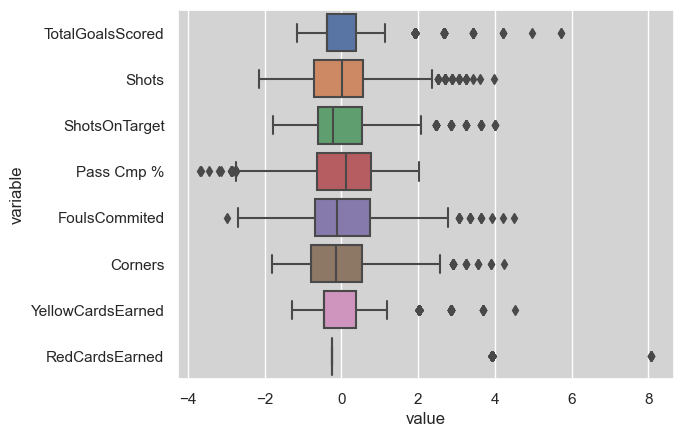

In [57]:
quant_palette = dict(zip(quant_metrics, sns.color_palette())) # Defining a color palette for consistency
sns.boxplot(data=standard_metrics.melt(), y='variable', x='value', palette=quant_palette);

Most of these metrics seem to have a lot of outliers on the positive side. Red cards earned especially seems to have just a few outliers, lets see what those are...

In [58]:
(metrics[['RedCardsEarned', 'Team']] # we're going back to quant_metrics so we can see the real values
 .sort_values('RedCardsEarned', ascending=False)
 .head())

,RedCardsEarned,Team
534,2,Brighton
2966,2,Chelsea
2688,2,Everton
398,2,Arsenal
399,2,Southampton


In [59]:
metrics['RedCardsEarned'].value_counts()

0    3303
1     196
2       5
Name: RedCardsEarned, dtype: int64

So what's happening is the large majority of teams are earning 0 red cards, with some earning one, even fewer earning 2, and only a single team (Newcastle) earning 3. This leads to the strange looking boxplot we saw above.

Keep in mind: These are metrics for specific matches, meaning in most matches, most teams are earning 0 red cards. Something that might be worth exploring later is seeing the distribution of total red cards for each team, or similar summed distributions for the other metrics.

Next we'll go through the quantitative metrics one by one and take a look at their distributions.

In [60]:
quant_metrics.columns # a list of all our quantitative metrics

Index(['TotalGoalsScored', 'Shots', 'ShotsOnTarget', 'Pass Cmp %',
       'FoulsCommited', 'Corners', 'YellowCardsEarned', 'RedCardsEarned'],
      dtype='object')

In [61]:
def graph_metric(metric, title=''):
    print(quant_metrics[metric].describe())
    fig = sns.histplot(data=quant_metrics,
                       x=metric,
                       bins=10,
                       palette=quant_palette)
    fig.set(title=title.title())
    return fig

#### Goals, Shots, Shots on Target

count    3504.000000
mean        1.371861
std         1.270728
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: TotalGoalsScored, dtype: float64


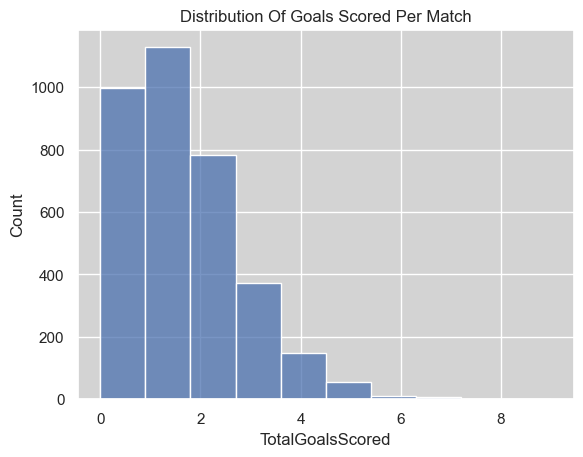

In [62]:
graph_metric('TotalGoalsScored', 'Distribution of goals scored per match');

From this, we can tell that most teams scored around 0-2 goals in their matches, while some outliers had 5+ goals. The data is heavily skewed right. This might suggest that most matches are pretty evenly matched, where both teams aren't winning by many goals and did not end up with more than 2 total goals scored. However, due to the rare mismatch or sweep, where one team dominates the other, there are a few matches that had many goals scored.

count    3504.000000
mean       12.452626
std         5.441568
min         0.000000
25%         8.000000
50%        12.000000
75%        16.000000
max        36.000000
Name: Shots, dtype: float64


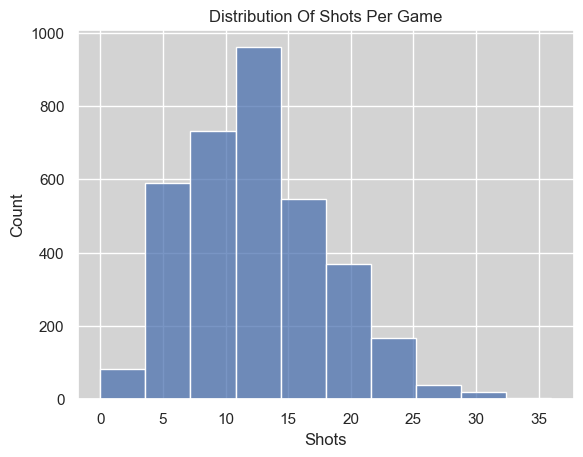

In [63]:
graph_metric('Shots', 'distribution of shots per game');

Shots per match seems pretty normally distributed across teams, with a mean around 12. This shows that most teams are taking around 8-15 shots per game. Interestingly, this is normal while goals scored is skewed right. This suggests that the distinction between low and high performing teams is not how many shots they take, but how clinical they are with their shots.

count    3504.000000
mean        4.335616
std         2.549723
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        15.000000
Name: ShotsOnTarget, dtype: float64


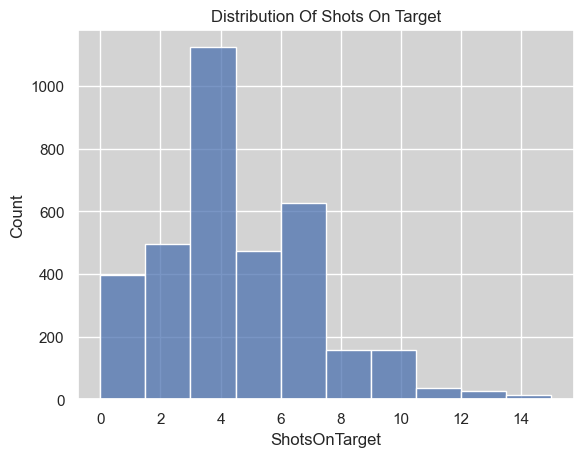

In [64]:
graph_metric('ShotsOnTarget', 'Distribution of shots on target');

However, Shots on Target (i.e. shots that were at the goal, but may or may not make it in) is more right-skewed, but still pretty normal.

So, while teams are generally taking shots normally, the shots that make it are skewed. *This suggests there are a few very high performing teams who have much higher shot accuracy, while most teams don't make nor almost make as many shots.* This corroborates with our earlier interpretation - high performing teams are more accurate with their shots, leading to more goals scored.

In [65]:
# Who are those high-performing teams?
(metrics[['ShotsOnTarget', 'Team']]
 .sort_values('ShotsOnTarget', ascending=False)
 .head(20)
 ['Team']
 .value_counts())

Liverpool     5
Man City      4
Arsenal       3
Tottenham     3
Man United    3
Leicester     1
Chelsea       1
Name: Team, dtype: int64

This tells us out of the top 20 highest-scoring matches, Liverpool had 5, Man city had 4, and so on. These 7 prestigious teams are making up the right of our goals distributions. When we do our analysis, we'll likely have to remember the uneven distribution of goals scored and account for the high performance of these teams.

#### Pass Completion

count    2302.000000
mean       77.405995
std         7.402786
min        50.200000
25%        72.700000
50%        78.400000
75%        83.100000
max        92.300000
Name: Pass Cmp %, dtype: float64


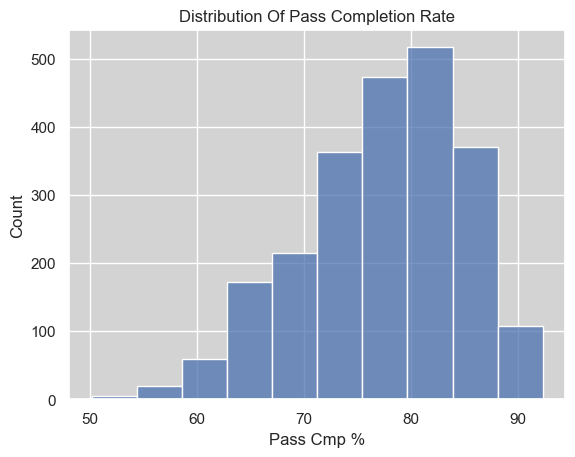

In [66]:
graph_metric('Pass Cmp %', 'Distribution of Pass Completion Rate');

The data seems to be centered around 70-80% pass completion, indicating that this is the most common range for pass completion. The distribution appears to be slightly left-skewed, meaning there are fewer instances of teams with very low pass completion rates compared to high ones. However there is also a lower count of very high performing temas with regards to passing. Let's continue this analysis by looking at each teams (whose passing data is accounted for) average.



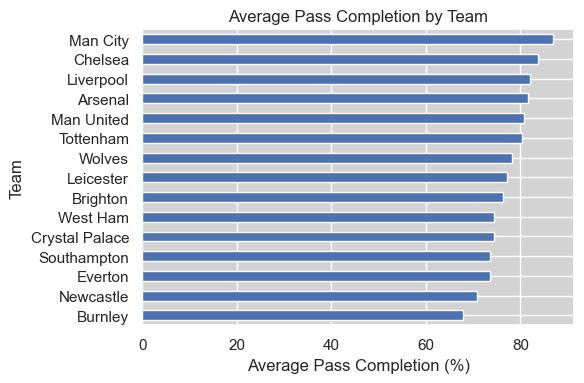

In [67]:
average_pass_cmp_per_team = metrics.dropna(subset=['Pass Cmp %']).groupby('Team')['Pass Cmp %'].mean()
plt.figure(figsize=(6, 4)) 
average_pass_cmp_per_team.sort_values().plot(kind='barh')
plt.xlabel('Average Pass Completion (%)')
plt.title('Average Pass Completion by Team')
plt.tight_layout()

# Show the plot
plt.show()

As we can see, the typically dominant teams have higher pass completion rates, which is expected. How does the passing performance correspond to total goals scored? Let's explore this, I will do so in the Bivariate Analysis section.

#### Fouls and Cards

count    3504.000000
mean       10.583904
std         3.500065
min         0.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        26.000000
Name: FoulsCommited, dtype: float64


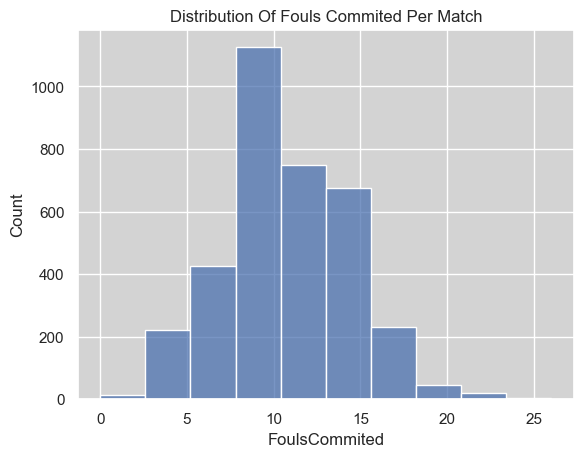

In [68]:
graph_metric('FoulsCommited', 'Distribution of Fouls commited per Match');

Seems fouls are normally distributed, with a mean of around 11. In each match, we'll see around 8 to 13 fouls commited by each side. The normal distribution also suggests that this might not be a contributing factor to the team's result. Let's see if this is reflected in the cards:

count    3504.000000
mean        1.604452
std         1.223027
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: YellowCardsEarned, dtype: float64
count    3504.000000
mean        0.058790
std         0.241255
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: RedCardsEarned, dtype: float64


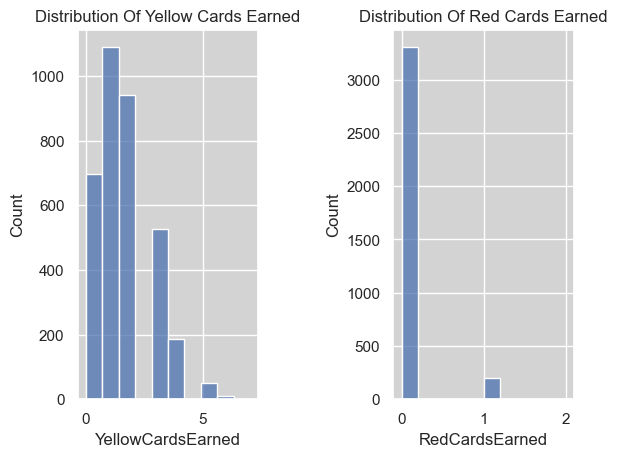

In [69]:
plt.subplot(1,2,1)
graph_metric('YellowCardsEarned', 'Distribution of Yellow Cards earned')
plt.subplot(1,2,2)
graph_metric('RedCardsEarned', 'Distribution of Red Cards earned');
plt.subplots_adjust(wspace=.75)

The yellow cards seem right skewed. This could mean that in most matches, teams don't earn many yellow cards, so you only see around 1-2 cards. However, the teams are playing more aggressive in the last few matches of the season, so there's a small number of matches with lots of yellow cards. These graphs also show that red cards are much rarer, possibly because they require an unusual amount of aggressiveness to earn and are more punishing.

#### Corners

count    3504.000000
mean        5.198630
std         2.924971
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        18.000000
Name: Corners, dtype: float64


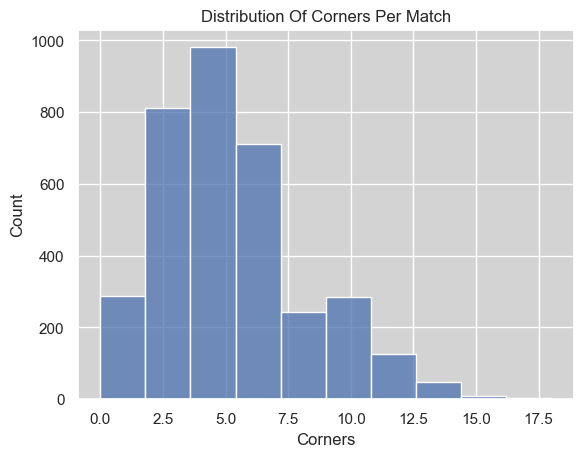

In [70]:
graph_metric('Corners', 'Distribution of corners per match');

Finally, Corners also seems a bit right skewed. Remember, this is corners earned, so this right skew is likely for the same reason as goals and shots on target: A few teams are performing at an extremely high level.

Another key takeaway of these right-skewed data distributions is that all of them are caused by a few matches in which one team performed exceptionally well. While this could be due to the level of performance of the team, it could potentially be that *the matches after manager changes are displaying exceptional performance.* Since these would only be a few matches out of the season, this would lead to the data being right skewed as shown. We will explore more about this in our final analysis.

### Aside: Goal percentage
We saw earlier that more accurate shots, rather than more shots, distinguished high performance from low performance. Let's create a new metric, called goal accuracy, that's just the proportion of goals scored out of all the shots taken by a team.
$$\text{Goal accuracy} = \frac{\text{Num goals scored}}{\text{Num shots taken}}$$

In [71]:
metrics['goal_acc'] = metrics['TotalGoalsScored'] / metrics['Shots']
# If they took 0 shots, goal_acc would be 0 / 0 = NaN, so we replace those with 0.0
metrics['goal_acc'] = metrics['goal_acc'].fillna(0.0)
metrics.head(3)

,Date,TotalGoalsScored,FullTimeResult,Team,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,IsHome,Won,goal_acc
0,01/01/17,0,H,Crystal Palace,7,4,NaN,7,4,1,0,False,False,0.000000
1,01/01/17,4,A,Tottenham,19,6,NaN,6,3,0,0,False,True,0.210526
2,02/01/17,0,H,Southampton,12,3,NaN,14,8,1,0,False,False,0.000000


Let's look at the distribution of our new metric:

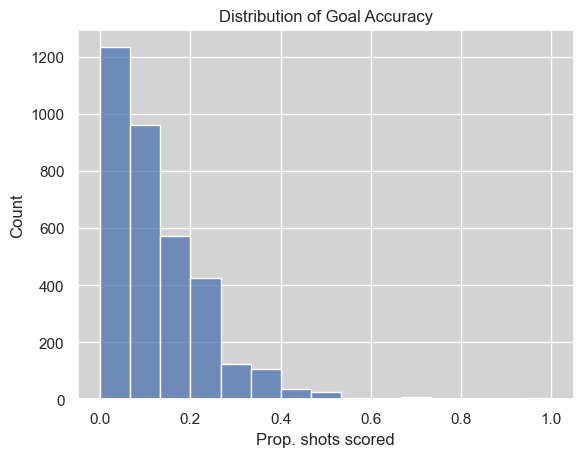

In [72]:
fig = sns.histplot(data=metrics, x='goal_acc', bins=15)
fig.set(title='Distribution of Goal Accuracy', xlabel='Prop. shots scored');

As we might have expected, this new metric is also right skewed. This is again due to the fact that there are a few high-performing teams scoring more and more often than the other teams, causing a small number of matches to have high goal accuracy.

## Qualitative Metrics
Now let's look at the distributions of the qualitative metrics. What these will tell us are which teams we have more data on, meaning which teams have stayed in the EPL the longest. It'll also give us a feel for which teams win the most, which *side* wins the most, etc.

In [73]:
qual_columns = ['FullTimeResult', 'Team', 'IsHome', 'Won']

In [74]:
qual_metrics = metrics[qual_columns + ['Date']]
qual_metrics.head()

,FullTimeResult,Team,IsHome,Won,Date
0,H,Crystal Palace,False,False,01/01/17
1,A,Tottenham,False,True,01/01/17
2,H,Southampton,False,False,02/01/17
3,H,Burnley,False,False,02/01/17
4,D,Leicester,False,NaN,02/01/17


### Full Time Result: Which side is winning more?

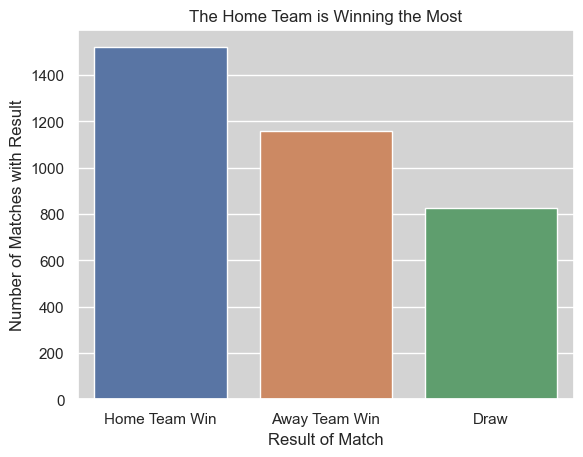

In [75]:
fig = sns.countplot(data=qual_metrics, x='FullTimeResult', order=['H', 'A', 'D'])
fig.set(title='The Home Team is Winning the Most', 
        xticklabels=['Home Team Win', 'Away Team Win', 'Draw'],
        xlabel='Result of Match',
        ylabel='Number of Matches with Result');

As expected, the "home court advantage" applies in the EPL. This graph tells us that out of all the matches, most ended with the home team winning.

### Teams: Who's stayed in the EPL? Who is our data representing?
Let's take a look to see which teams are most represented by the metrics data we have.

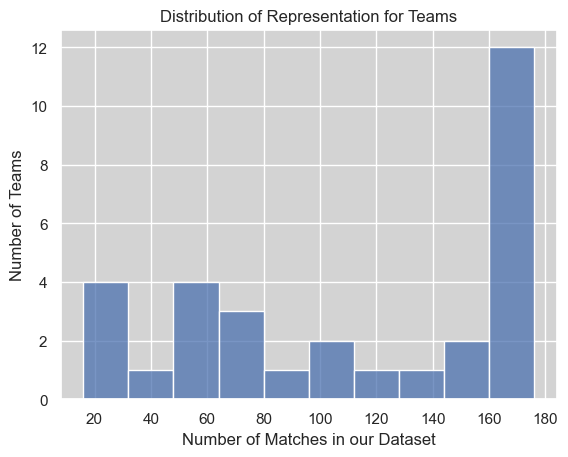

In [76]:
team_counts = qual_metrics['Team'].value_counts()
fig = sns.histplot(team_counts, bins=10)
fig.set(title='Distribution of Representation for Teams',
        xlabel='Number of Matches in our Dataset',
        ylabel='Number of Teams');

This histogram graphs the distribution of representation in our dataset. This means that there are 12 teams that have played 160-180 matches whose metrics were recorded in our data.

As can be seen, there is a peak at the right end. These 12 teams make up the bulk of our dataset, and whose metrics are overrepresented. We'll have to remember this for our later analysis, and remember to normalize metrics for each team so we're looking at true changes in performance, and not just raw numbers.

# Bivariate Analysis

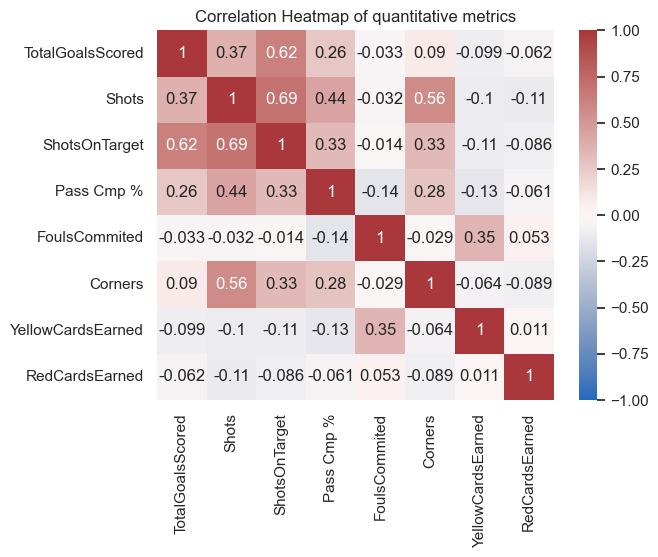

In [77]:
heat = sns.heatmap(metrics[quant_columns].corr(), annot=True, cmap=sns.color_palette('vlag', as_cmap=True), vmax=1, vmin=-1)
heat.set(title='Correlation Heatmap of quantitative metrics');

This gives us the correlation coefficient for all the quantitative metrics: The farther from 0, the more correlated, while the sign indicates the direction. In this graph, darker colors are associated with higher correlations. As can be seen, not many strong correlations exist. Let's take a look at all pairs of metrics with a strong (>0.5) correlation (and one other surprising result).

### Shots vs. Goals
>**You miss 100% of the shots you don't take.**
<br>*-Wayne Gretzky*
<br>*~~-Michael Scott~~*

Does taking more shots make you more likely to score more goals? This could influence our analysis, as if this is true, then there would exist multicollinearity in our dataset between shots and goals. The correlation was surprisingly low for these two metrics: let's take a look to check our intuition.

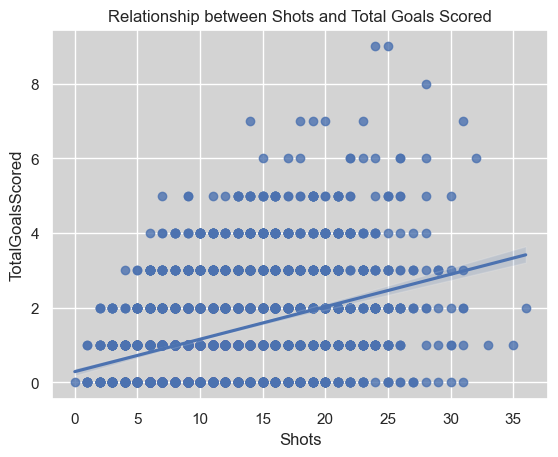

In [78]:
fig = sns.regplot(data=metrics, x='Shots', y='TotalGoalsScored')
fig.set(title='Relationship between Shots and Total Goals Scored');

In [79]:
linmod = LinearRegression()
X = metrics[['Shots']]
y = metrics['TotalGoalsScored']
linmod.fit(X, y)
linmod.score(X, y)

0.13852245345396408

The above score tells us how well a linear model describes the relationship. As can be seen by the low score, while there is a positive correlation, these two metrics are not very strongly related. In other words, taking more shots wasn't the only thing that caused teams to score more goals. Sorry, Wayne (and Michael).

### Shots on Target vs. Goals
These two metrics had a higher correlation (0.622), so let's do the same for them. 

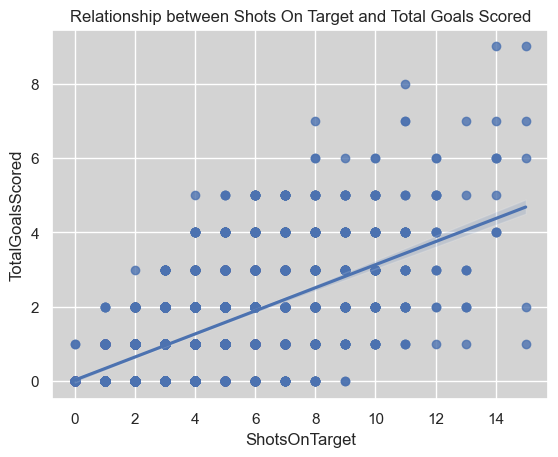

In [80]:
fig = sns.regplot(data=metrics, x='ShotsOnTarget', y='TotalGoalsScored');
fig.set(title='Relationship between Shots On Target and Total Goals Scored');

*This grid-like pattern is to be expected, since both metrics are only measured in whole numbers.*

In [81]:
# reports the R^2 score for a linear model
linmod = LinearRegression()
X = metrics[['ShotsOnTarget']]
y = metrics['TotalGoalsScored']
linmod.fit(X, y)
linmod.score(X, y)

0.3874494453266607

Looking at the graph, they definitely feel more correlated than just shots and goals. Running and evaluating a linear model also supports this idea: the score is higher. This tells us having more shots on target leads more to scoring more goals in total.

#### Shots vs. Shots on Target

[Text(0.5, 1.0, 'Relationship between Shots and Shots on Target')]

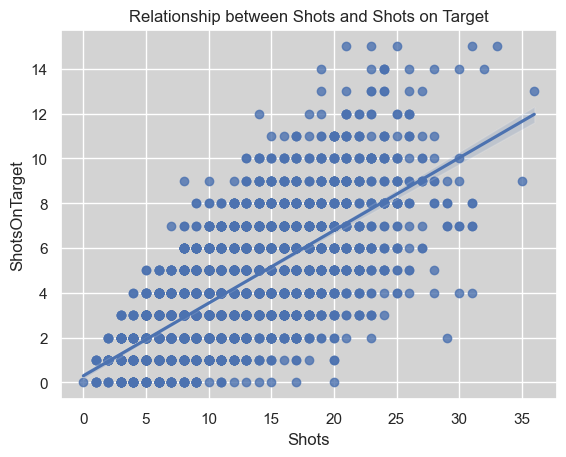

In [82]:
fig = sns.regplot(data=metrics, x='Shots', y='ShotsOnTarget');
fig.set(title='Relationship between Shots and Shots on Target')

In [83]:
# reports the R^2 score for a linear model
linmod = LinearRegression()
X = metrics[['Shots']]
y = metrics['ShotsOnTarget']
linmod.fit(X, y)
linmod.score(X, y)

0.47900323933535904

This tells us that while taking more shots doesn't necessarily net you more goals, it does strongly correlate with your shots on target.

#### Corners vs. Shots
There's one last relationship to investigate with strong (0.5 - 1.0) correlation: Corners and shots taken.

[Text(0.5, 1.0, 'Relationship between Corners and Shots')]

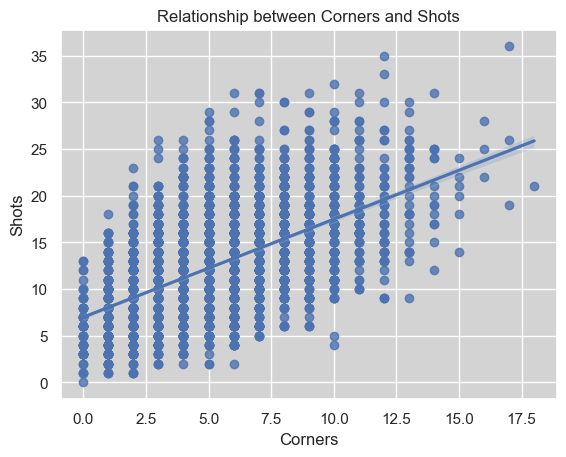

In [84]:
fig = sns.regplot(data=metrics, x='Corners', y='Shots');
fig.set(title='Relationship between Corners and Shots')

In [85]:
# reports the R^2 score for a linear model
linmod = LinearRegression()
X = metrics[['Corners']]
y = metrics['Shots']
linmod.fit(X, y)
linmod.score(X, y)

0.3180963562612781

This graph shows a moderately strong relationship between corners and shots. The strong relationship here could be attributed to more opportunities being opened after being awarded a corner kick.

#### Goals vs Pass Completion

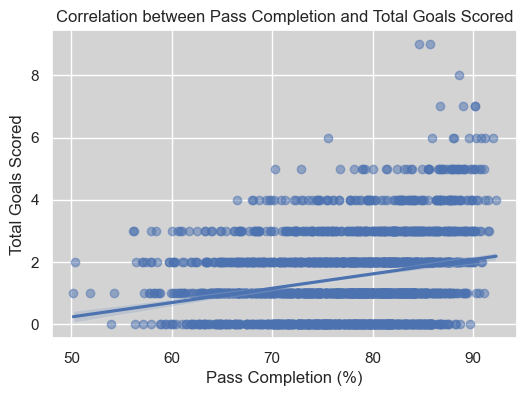

In [86]:
metrics_with_pass_cmp = metrics.dropna(subset=['Pass Cmp %'])

plt.figure(figsize=(6, 4))
sns.regplot(x='Pass Cmp %', y='TotalGoalsScored', data=metrics_with_pass_cmp, scatter_kws={'alpha':0.5})
plt.title('Correlation between Pass Completion and Total Goals Scored')
plt.xlabel('Pass Completion (%)')
plt.ylabel('Total Goals Scored')

plt.show()

The upward slope of the regression line suggests there is a positive correlation between pass completion and the total goals scored. As pass completion increases, total goals scored also tend to increase. While there is a positive trend, the pass completion rate alone may not be a strong predictor of the number of goals scored due to the high variance observed in the data, we can see that there are quite a few outliers, who had a good cmp, with a total goals count being much higher than other clubs with similar pass cmp results.

Lets quantify the stength between Pass Completion and Total Goals Scored.

In [87]:
correlation_coefficient = metrics_with_pass_cmp['Pass Cmp %'].corr(metrics_with_pass_cmp['TotalGoalsScored'])

print(f"The Pearson correlation coefficient between pass completion and total goals scored is: {correlation_coefficient}")

The Pearson correlation coefficient between pass completion and total goals scored is: 0.26067361269236344


As we can see, the correlation between these two does exist and it is positive, but it is weaker than one might expect, indicating that a team's passing completion rate does not have as much of an impact on goals scored as I thought it would, interesting! I will continue the exploaration of this passing statistic, analyzing it over time.

### Quantitative metrics over time
Something that might be interesting is tracking how these metrics change from match to match. Since we have the dates, we can graph these metrics over the time period we have.

We'll start with goals, just to check if our methods are worthwhile.

In [88]:
# converting date to datetime
quant_time = metrics[quant_columns + ['Date']].copy()
quant_time['Date'] = pd.to_datetime(quant_time['Date'], format='%d/%m/%y')
quant_time.head()

,TotalGoalsScored,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,Date
0,0,7,4,NaN,7,4,1,0,2017-01-01
1,4,19,6,NaN,6,3,0,0,2017-01-01
2,0,12,3,NaN,14,8,1,0,2017-01-02
3,1,11,3,NaN,11,8,3,0,2017-01-02
4,0,10,4,NaN,9,2,0,0,2017-01-02


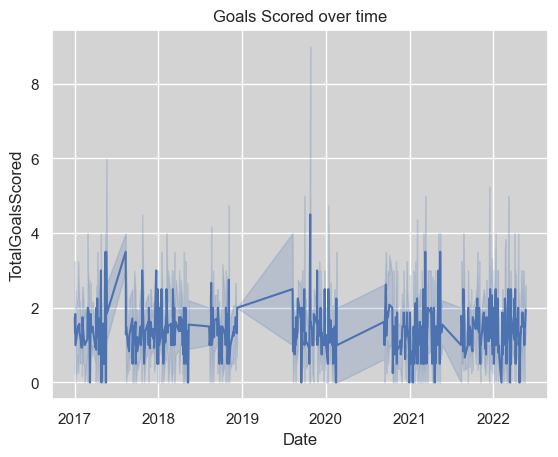

In [89]:
fig = sns.lineplot(data=quant_time, x='Date', y='TotalGoalsScored')
fig.set(title="Goals Scored over time");

Problem: we have so much data that this takes a long time and is very unhelpful. This may look random, but that actually makes sense: Right now, we're just looking at the goals scored for all teams across their matches, so it would be pretty random and have no clear trend, unless all the teams were improving in unison. Let's look at the pass completion metric over time. 

Text(0.5, 1.0, 'Pass Completion Rate over Time')

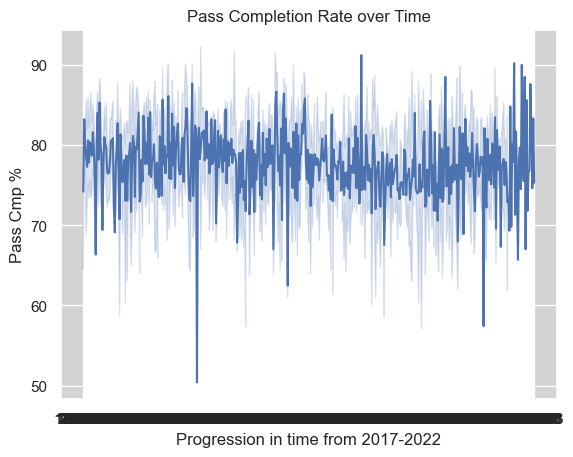

In [90]:

sns.lineplot(data=metrics_with_pass_cmp, x='Date', y='Pass Cmp %')
plt.xlabel('Progression in time from 2017-2022')
plt.title('Pass Completion Rate over Time')

Woah, that is one crazy graph. Similarly to above, we are looking at this metric for all teams across the years. Let's clean this up by using a teams average and how it changes from year to year. We'll take the average pass completion rate for every year and graph that.

That's a lot of information, so we'll separate out a few of the more interesting teams and just look at their change in Pass Completion rate per year.

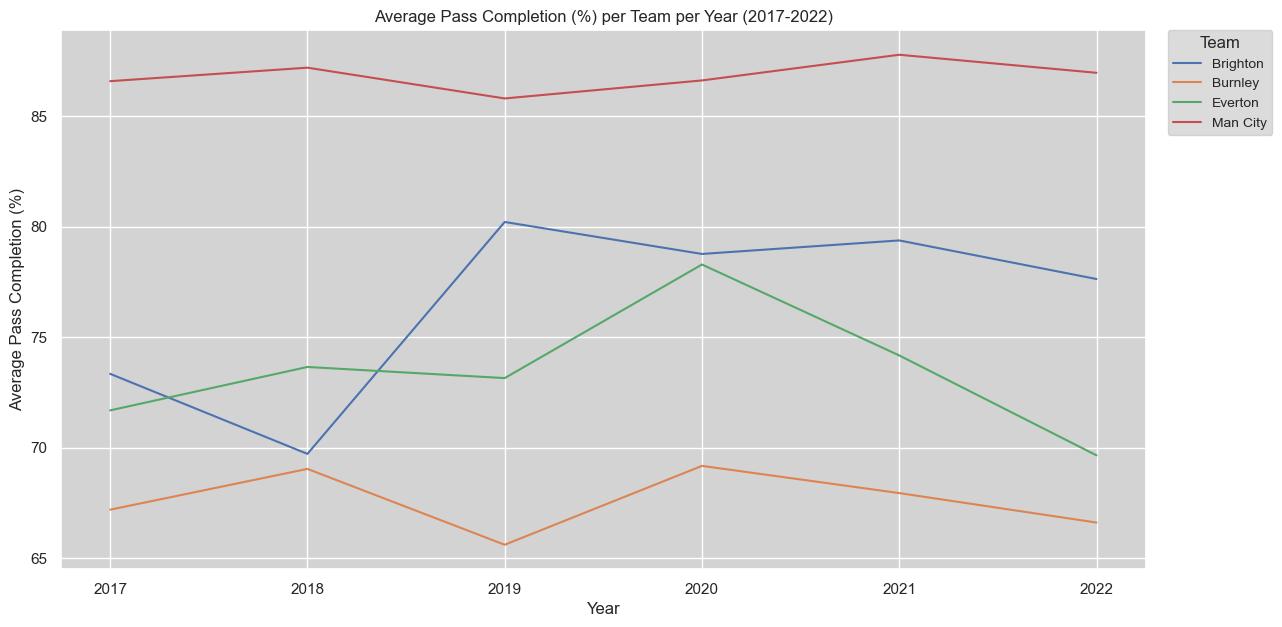

In [91]:
metrics_with_pass_cmp['Date'] = pd.to_datetime(metrics_with_pass_cmp['Date'], format='%d/%m/%y')
metrics_with_pass_cmp['Year'] = metrics_with_pass_cmp['Date'].dt.year
team_yearly_avg = metrics_with_pass_cmp.groupby(['Team', 'Year'])['Pass Cmp %'].mean().reset_index()
team_yearly_avg = team_yearly_avg[team_yearly_avg['Team'].isin(['Brighton', 'Burnley', 'Man City', 'Everton'])]
plt.figure(figsize=(14, 7))
sns.lineplot(data=team_yearly_avg, x='Year', y='Pass Cmp %', hue='Team')
plt.legend(title='Team', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad= 0, fontsize='small')
plt.title('Average Pass Completion (%) per Team per Year (2017-2022)')
plt.ylabel('Average Pass Completion (%)')
plt.xlabel('Year')
plt.show()

We can see that Man City performed consistently high in this metric, and Burnley performed consistently low. However, Brighton and Everton's Pass Completion Rate had relatively large jumps. This is very interesting, as Man City did not have any managerial changes during this period, while Brighton and Everton had many. This could point to the fact that changing managers causes more volatility in this metric! It also shows that Pass Completion is one of the metrics that varies greatly with managerial changes.

Keep in mind our y-axis is scaled to show the differences better. These changes are jumps of about 10%, which is still significant.

We might be able to glean more information by looking at individual teams.

In [92]:
# pick the team with the most data, for now
metrics['Team'].value_counts().idxmax()

'Crystal Palace'

In [93]:
arsenal_metrics = metrics[metrics['Team'] == 'Arsenal']
arsenal_quant_time = arsenal_metrics[quant_columns + ['Date']].copy()
arsenal_quant_time['Date'] = pd.to_datetime(arsenal_quant_time['Date'], format='%d/%m/%y')
arsenal_quant_time.head()

,TotalGoalsScored,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,Date
8,3,14,4,NaN,12,7,3,0,2017-01-03
16,4,14,6,NaN,8,2,0,0,2017-01-14
42,1,9,5,NaN,8,13,1,0,2017-02-04
71,1,7,3,NaN,15,3,2,0,2017-03-04
90,1,11,2,NaN,6,5,0,0,2017-03-18


Text(0.5, 1.0, 'Total Goals Scored by Month')

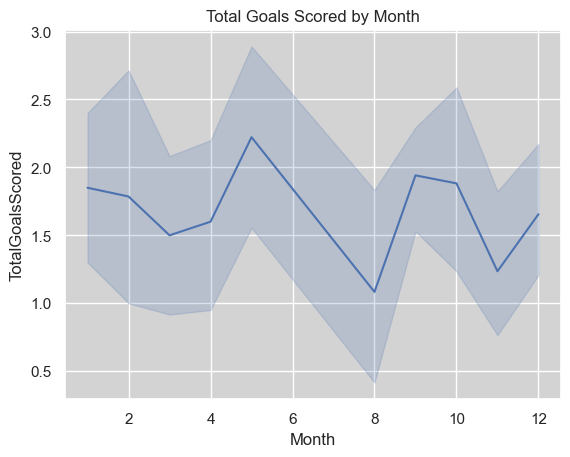

In [94]:
arsenal_quant_time['Month'] = arsenal_quant_time['Date'].dt.month
sns.lineplot(data=arsenal_quant_time, y='TotalGoalsScored', x='Month');
plt.title('Total Goals Scored by Month')

We do see some spikes and valleys. The idea is these could correspond to changes in manager.

Let's test that theory a bit: 

In [95]:
managers[managers['Club'] == 'Arsenal']

,Club,Predecessor,Join date,Coach
19,Arsenal,Stewart Houston,15/6/1995,Bruce Rioch
23,Arsenal,George Graham,21/2/1995,Stewart Houston
35,Arsenal,Bruce Rioch,30/6/1996,Stewart Houston
49,Arsenal,Pat Rice,30/9/1996,Arsène Wenger
50,Arsenal,Stewart Houston,13/9/1996,Pat Rice
302,Arsenal,Arsène Wenger,30/6/2018,Unai Emery
340,Arsenal,Freddie Ljungberg,21/12/2019,Mikel Arteta
345,Arsenal,Unai Emery,29/11/2019,Freddie Ljungberg


Looks like Arsenal had some manager changes in 2019. We can zoom into our metrics in 2019 and see if there was an effect.

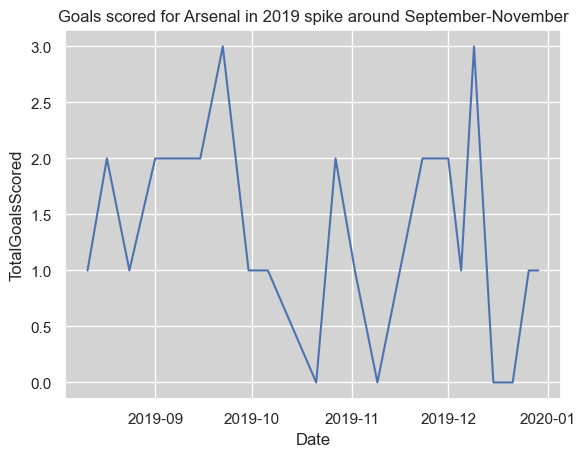

In [96]:
# Zooming into 2019
arsenal_qt_2019 = arsenal_quant_time[arsenal_quant_time['Date'].dt.year == 2019]
fig = sns.lineplot(data=arsenal_qt_2019, y='TotalGoalsScored', x='Date') # just goals
fig.set(title='Goals scored for Arsenal in 2019 spike around September-November');

Again, there are some pretty significant spikes in this graph. Do they also occur in other metrics? Let's take a loot at Arsenals passing performance, and see if it aligns.

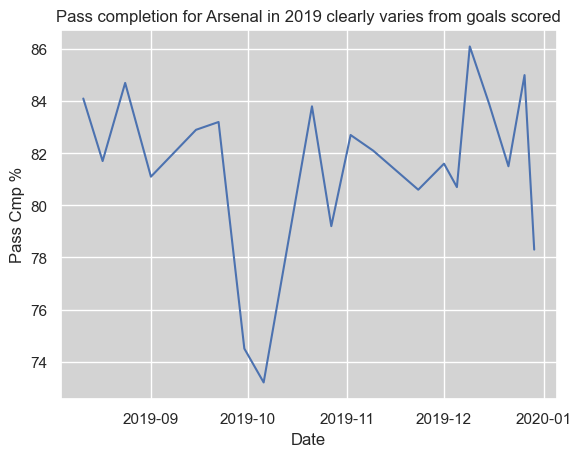

In [97]:
fig = sns.lineplot(data=arsenal_qt_2019, y='Pass Cmp %', x='Date') # just passing cmp
fig.set(title='Pass completion for Arsenal in 2019 clearly varies from goals scored');

Interestingly enough, there was a massive dip between May and July in pass completion.

In [98]:
managers[(managers['Club'] == 'Arsenal') & (managers['Join date'].str[-4:] == '2019')]

,Club,Predecessor,Join date,Coach
340,Arsenal,Freddie Ljungberg,21/12/2019,Mikel Arteta
345,Arsenal,Unai Emery,29/11/2019,Freddie Ljungberg


Here we see something promising: All our metrics jumped up somewhere in late November of 2019, which is when Freddie Ljungberg took over for Unai Emery. The same happened at the end of December - but also at the end of September and October, when there were no changes in manager. Curious.

Let's look at which teams are changing their managers the most, and also let's find out the average number of managerial changes across all teams. Mabye then we look at a team that has changed their manager around the average number of times, and compare its metrics alongside one that has only changed it a few times.

In [99]:
num_of_managerial_changes_per_team = managers['Club'].value_counts()
print(num_of_managerial_changes_per_team.head(5))
print()
average_managerial_changes = num_of_managerial_changes_per_team.mean()
print(f"Teams are changing their manager an average of {average_managerial_changes} times.")

Tottenham      25
Chelsea        24
Southampton    24
Newcastle      24
Aston Villa    22
Name: Club, dtype: int64

Teams are changing their manager an average of 8.891304347826088 times.


In [100]:
managers[managers['Club'] == 'Man United']

,Club,Predecessor,Join date,Coach
224,Man United,Sir Alex Ferguson,30/6/2013,David Moyes
238,Man United,David Moyes,22/4/2014,Louis van Gaal
275,Man United,Louis van Gaal,23/5/2016,José Mourinho
325,Man United,Ole Gunnar Solskjær,28/3/2019,Ole Gunnar Solskjær
332,Man United,José Mourinho,18/12/2018,Ole Gunnar Solskjær
361,Man United,Ralf Rangnick,31/5/2022,Erik ten Hag
367,Man United,Michael Carrick,3/12/2021,Ralf Rangnick
368,Man United,Ole Gunnar Solskjær,21/11/2021,Michael Carrick


Man United is another team that has changed managers roughly around the average amount. Specifically, let's look at the transition from Mourinho to Ole because this took the club from managerial stability for a decent period of time (close to three years) and represented a significant shift in coaching style. Mourinho was very pragmatic and results-focused in his style of play and prioritized winning over "pretty football." Mourinho also had boatloads of experience with winning major honours with other big clubs before he took the Man United job. On the other hand, Ole was a club legend (as a player) who was very new to management and whose style of play was more free-flowing and risky. His appointment also represented a culture-shift around the club, as players and fans alike were excited to have a popular ex-player in charge. All this to say, I think it would be very useful to look at this managerial change since it is representative of a genuine shift in philosiphy and culture. 

In [101]:
manU_metrics = metrics[metrics['Team'] == 'Man United']
manU_quant_time = manU_metrics[quant_columns + ['Date']].copy()
manU_quant_time['Date'] = pd.to_datetime(manU_quant_time['Date'], format='%d/%m/%y')
manU_quant_time.head()

,TotalGoalsScored,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,Date
7,2,13,6,NaN,13,1,2,0,2017-01-02
27,1,25,8,NaN,13,7,0,0,2017-01-21
50,3,15,9,NaN,13,3,4,0,2017-02-05
93,3,14,6,NaN,8,3,1,0,2017-03-19
123,3,18,9,NaN,20,5,5,0,2017-04-09


Ole was appointed mid-December of 2018, so let's look specifically at the end of 2018, and the year of 2019.

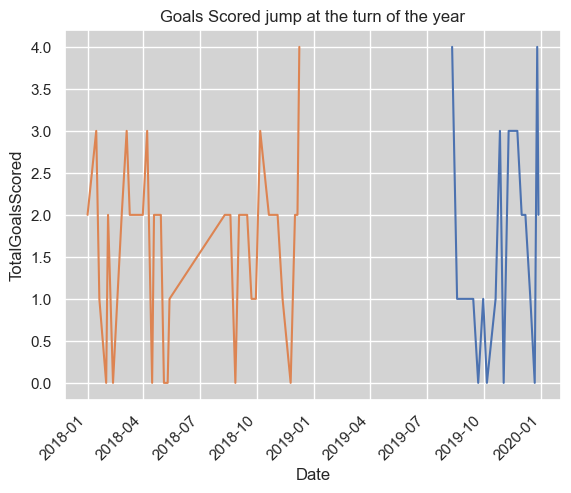

In [102]:
manU_qt_2019 = manU_quant_time[manU_quant_time['Date'].dt.year == 2019]
manU_qt_2018 = manU_quant_time[manU_quant_time['Date'].dt.year == 2018]
fig = sns.lineplot(data=manU_qt_2019, y='TotalGoalsScored', x='Date') # just goals
fig2 = sns.lineplot(data=manU_qt_2018, y = 'TotalGoalsScored', x='Date')
plt.xticks(rotation=45, ha = 'right')
fig.set(title='Goals Scored jump at the turn of the year');

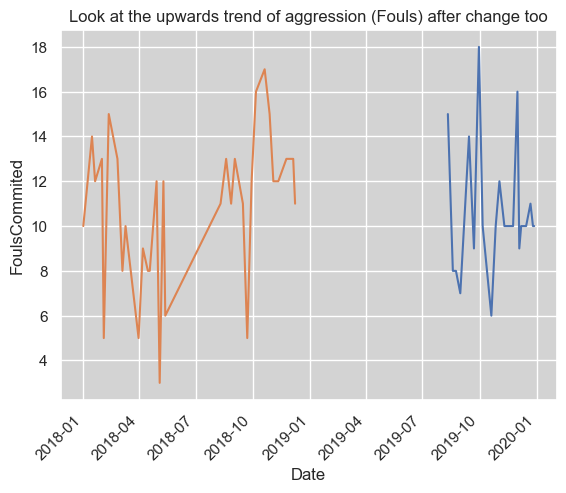

In [103]:
fig = sns.lineplot(data=manU_qt_2019, y='FoulsCommited', x='Date') # just goals
fig2 = sns.lineplot(data=manU_qt_2018, y = 'FoulsCommited', x='Date')
plt.xticks(rotation=45, ha = 'right')
fig.set(title='Look at the upwards trend of aggression (Fouls) after change too');

### Metrics by Team
Let's break down some other metrics by teams and see how different they are.

In [104]:
metrics_by_team = metrics[quant_columns + ['Team']].groupby('Team').mean().reset_index()
metrics_by_team.head(3)

,Team,TotalGoalsScored,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned
0,Arsenal,1.698864,13.880682,4.960227,81.541026,10.113636,5.846591,1.681818,0.090909
1,Aston Villa,1.382353,12.774510,4.539216,NaN,11.156863,5.362745,1.843137,0.058824
2,Bournemouth,1.262626,11.555556,3.939394,NaN,9.020202,5.161616,1.565657,0.070707


In [105]:
metrics_by_team.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalGoalsScored,31.0,1.213840,0.459598,0.526316,0.924890,1.096591,1.396891,2.520000
Shots,31.0,11.868896,2.076744,9.105263,10.594161,11.555556,12.641541,17.822857
ShotsOnTarget,31.0,4.016202,0.972848,2.684211,3.269955,3.722222,4.532465,6.520000
Pass Cmp %,15.0,77.419137,5.159094,67.754487,73.980769,77.192308,81.111859,86.985256
FoulsCommited,31.0,10.737768,0.971102,9.020202,9.963068,10.842105,11.278045,13.000000
Corners,31.0,4.961368,0.825724,3.421053,4.390326,4.772727,5.369944,7.588571
YellowCardsEarned,31.0,1.650680,0.196744,1.160000,1.556674,1.617143,1.738558,2.118421
RedCardsEarned,31.0,0.061952,0.029017,0.017544,0.046295,0.057143,0.076617,0.157895


This chart gives us the team-wise summary stats instead of the full match-per-team-wise stats we had before. Notice the means are actually very close to our original stats: This is expected, since they're just the mean of means. What is more interesting is the variance: We can see that shots had a very high variance from row 2 column 3 of the chart, meaning the average number of shots per match varied widely from team to team.

#### Relationships in Metrics by Team
Now that we've broken things down by team, we can get a much better look at the relationships between different metrics. Since we're using average metrics by teams, no single team's stats will be overrepresented, which should hopefully eliminate some biases.

[Text(0.5, 1.0, 'Correlation of Metrics by Team')]

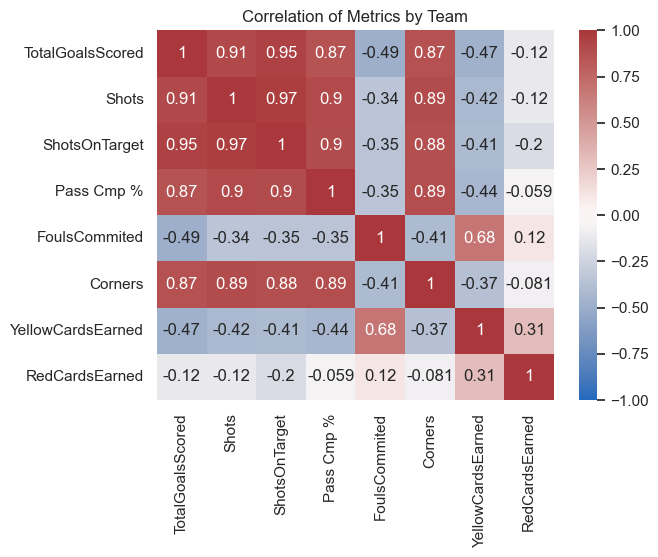

In [106]:
heat = sns.heatmap(metrics_by_team[quant_columns].corr(), annot=True, cmap=sns.color_palette('vlag', as_cmap=True), vmax=1, vmin=-1)
heat.set(title='Correlation of Metrics by Team')

We can see that there are a lot more strong relationships to be found, even relationships we didn't see before! For example, we can see a huge increase in the correlation between corners and total goals scored. This is probably because the higher-performing teams were scoring regardless of whether they were awarded corners or not, which reduced the correlation in the overall dataset. We can also see a strong *negative* correlation between fouls commited and goals scored/goal accuracy, and a moderate negative correlation for other foul metrics (cards earned). This could mean that more aggression doesn't necessarily mean higher performance as far as goals scored.

*The original correlation heatmap before grouping by teams is shown below, as a reminder. Notice the weaker correlations for practically every metric.*

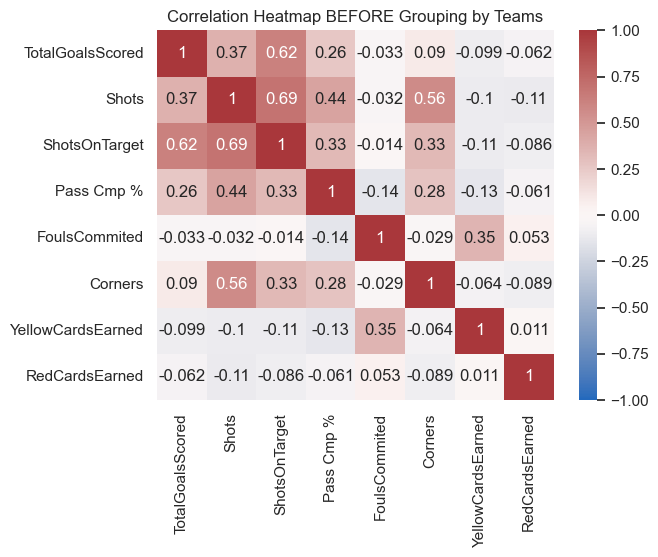

In [107]:
heat2 = sns.heatmap(metrics[quant_columns].corr(), annot=True, cmap=sns.color_palette('vlag', as_cmap=True), vmax=1, vmin=-1)
heat2.set(title='Correlation Heatmap BEFORE Grouping by Teams');

### Metric Contribution to Win
A huge part of our analysis is to look at which specific metrics managerial changes are influencing that lead to higher win rates. Let's see if we can, from this dataset, explore which metrics are most important for a win. That way we'll know which metrics to look for changes in when analyzing the effect of manager changes.

To do this, we'll use the `Won` column in `metrics`. Currently, it has the value `True` if the team won that match, `False` if not, and `NaN` if it was a draw.

To properly do this analysis, we'll need to convert it all to numerical data, using the [three-points for a win](https://en.wikipedia.org/wiki/Three_points_for_a_win#:~:text=Three%20points%20for%20a%20win%20is%20a%20standard%20used%20in,each%20team%20receives%20one%20point.) system. This is so that teams are rewarded for draws, as they would be in the real world, instead of setting draws to be 0, same as losses.

TODO: Add more details about this system

In [108]:
metrics['Won'].head()

0    False
1     True
2    False
3    False
4      NaN
Name: Won, dtype: object

In [109]:
# Creating PWBR column to represent point result of match
result_points = metrics['Won'].replace({
    True: 3.0,
    False: 0.0
}).fillna(1.0)
metrics['PointsWonByResult'] = result_points
metrics['PointsWonByResult'].head()

0    0.0
1    3.0
2    0.0
3    0.0
4    1.0
Name: PointsWonByResult, dtype: float64

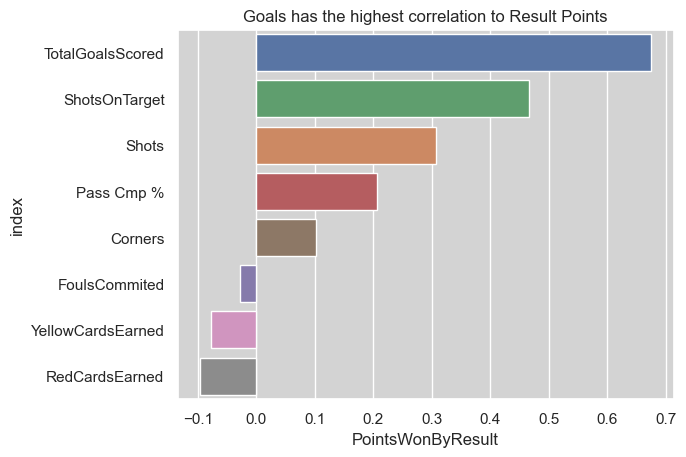

In [110]:
correlation_to_PWBR = metrics[quant_columns + ['PointsWonByResult']].corr()[['PointsWonByResult']].drop('PointsWonByResult').reset_index()
# defining a custom palette to have consistency
quant_palette = dict(zip(quant_metrics, sns.color_palette()))
correl = sns.barplot(data=correlation_to_PWBR.sort_values('PointsWonByResult', ascending=False),
                   y='index', x='PointsWonByResult', palette=quant_palette)
correl.set(title = 'Goals has the highest correlation to Result Points');

This graph states the obvious: The more goals you score and the more accurate your shots are, the more likely you are to win. It looks like there's not much more we can glean from this dataset alone.

### Metric Contribution by Team
We saw earlier that overrepresentation from high-scoring teams was causing skews in our data. Let's redo this analysis, but this time average metrics for each team.

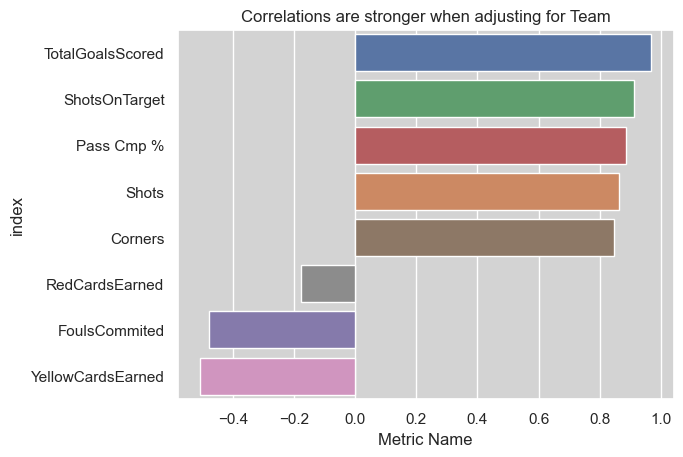

In [111]:
metrics_by_team = metrics[quant_columns + ['PointsWonByResult', 'Team']].groupby('Team').mean() # Recalculate so that we have result points
correlation_to_PWBR = metrics_by_team[quant_columns + ['PointsWonByResult']].corr()[['PointsWonByResult']].drop('PointsWonByResult').reset_index()
correl = sns.barplot(data=correlation_to_PWBR.sort_values('PointsWonByResult', ascending=False),
                   y='index', x='PointsWonByResult', palette=quant_palette)
correl.set(title='Correlations are stronger when adjusting for Team',
           xlabel='Metric Name');

This had the same effect as we saw earlier: all the weaker correlations became stronger, now that the overrepresentation of those higher-performing teams are accounted for. Grouping by team, we can see that pass completion and corners actually have a much stronger influence on the result of a match than before.

### EDA Summary Thus Far:
We have analyzed relationships between all of our in-game variables (fouls, shots, goals cards, etc..) as well as how some of those metrics change alongside the managerial coming and goings of a couple clubs. We have also started to come up with a way to determine which metrics are the biggest contributing factors to wins (and more specifically, points gained). Then, averaging our metrics across teams as a whole, we were able to spot some generalized trends between goals, shots, fouls, etc.. and the points that were won by the result. 

Our final objective now lies in correlating our set of managerial changes with the metrics we have averaged on a team-basis. Plotting those relationships will give us our final insight into what the relationship between a team's managerial changes and their short-terms success after said change. 

# Data Analysis
It's time to do our final analysis. Here, we can use all we learned from our EDA to answer our question:
##### **In the English Premier League, does a managerial change postively affect a team's performance in the next ten games in terms of win/loss ratio, points per game, and shots per quantity of possession, among various other metrics?** 

To start, here's a summary of what we learned from EDA:
- The representation in our dataset is left-skewed, and many metrics are right-skewed. This is mostly due to the way our data is set up: The higher performing a team is, the longer they'll stay in the League, and therefore the more represented they will be in our dataset. 
    - There are a few teams (ex: Crystal Palace, Arsenal, Tottenham) that are performing really well, getting super high metrics, and staying in the league for a long time.
- Besides goals scored, the metrics that contributed the most to a positive result were Shots on Target, Pass Completion, Shots, and Corners. The metrics that negatively contributed to a positive result were Yellow Cards Earned and Fouls Committed.
    - From this, we can safely define the former metrics as positive, and the latter as negative.
    - In our analysis, we'll want to define an "increase in performance" as an increase in the positive metrics, and a decrease in the negative metrics. However, we can analyze both separately.

Our final analysis will roughly follow this procedure:
1. Combine the metrics and managers datasets, so we know the manager for each team for each match.
2. Graph the changes in metrics for each manager over time, looking specifically to see if there's a jump in the beginning.
3. Calculate the average metrics in the first 10 matches of a manager's term.
4. Run a hypothesis test to see if there is significant improvement in performance than the entirety of the manager's *predecessor's* term.
    - "Significant Improvement" will be defined as significantly higher positive metrics, and significantly lower negative metrics.
    - More details on this process below.
5. Repeat for every manager for every team.
    - Using this, find the proportion of teams who experienced a significant new-manager bounce.
6. Present results.

## Step 1: Combining the datasets
In order to proceed with our analysis, we'll have to put our manager data into our metrics data. To do this, we'll add a column into the metrics data, `'Manager'`, which simply gives the name of the manager for the team during the time of that match.

In [112]:
metrics = pd.read_csv(Path('data') / 'metrics_clean.csv')
metrics.tail()

,Date,TotalGoalsScored,FullTimeResult,Team,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,IsHome,Won
3499,08/12/18,0,A,Leicester,11,3,76.2,12,6,3,0,True,False
3500,08/12/18,4,H,Man United,20,11,83.4,11,10,1,0,True,True
3501,08/12/18,3,H,West Ham,13,6,78.1,10,5,1,0,True,True
3502,09/12/18,1,A,Newcastle,12,4,76.1,10,4,2,1,True,False
3503,10/12/18,2,D,Everton,12,5,75.3,13,6,1,0,True,NaN


In [113]:
managers = pd.read_csv(Path('data')/'managers_clean.csv')
managers

,Club,Predecessor,Join date,Coach
0,Chelsea,David Webb,30/6/1993,Glenn Hoddle
1,Tottenham,Doug Livermore,19/6/1993,Osvaldo Ardiles
2,Tottenham,Ray Clemence,19/6/1993,Osvaldo Ardiles
3,Crystal Palace,Steve Coppell,17/5/1993,Alan Smith
4,Nottingham Forest,Brian Clough,8/5/1993,Frank Clark
...,...,...,...,...
404,Wolves,Bruno Lage,2/10/2022,Steve Davis
405,Brighton,Andrew Crofts,17/9/2022,Roberto De Zerbi
406,Chelsea,Thomas Tuchel,7/9/2022,Graham Potter
407,Brighton,Graham Potter,7/9/2022,Andrew Crofts


Let's convert everything into Timestamps first, to make comparisons easier.

In [114]:
pd.to_datetime('10/01/17', format='%d/%m/%y')

Timestamp('2017-01-10 00:00:00')

In [115]:
metrics['Date'] = pd.to_datetime(metrics['Date'], format='%d/%m/%y')
managers['Join date'] = pd.to_datetime(managers['Join date'], format='%d/%m/%Y')
metrics['Date'].iloc[-1].month

12

To combine the two, we'll add a preliminary column with a list of tuples of the form `(join_date, manager, predecessor)` for each team.

In [116]:
# Helper function to get list of man/date tuples for a given df
def get_man_dates(df):
    all_mans = list(zip(df['Join date'], df['Coach'], df['Predecessor']))
    sorted_mans = sorted(all_mans, key=lambda x: x[0])
    result = []
    name_counts = dict()
    for date, name, pred in sorted_mans:
        if name in name_counts:
            name_counts[name] += 1
            name = f'{name}_{name_counts[name]}'
        else:
            name_counts[name] = 1
        if pred in name_counts and name_counts[pred] > 1:
            pred = f'{pred}_{name_counts[pred]}'
        result.append((date, name, pred))
    return result
all_managers = managers.groupby('Club')[['Join date', 'Coach', 'Predecessor']].apply(get_man_dates).reset_index()
all_managers.columns = ['Team', 'All Managers']
all_managers.head()

,Team,All Managers
0,Arsenal,"[(1995-02-21 00:00:00, Stewart Houston, George..."
1,Aston Villa,"[(1994-11-10 00:00:00, Brian Little, Ron Atkin..."
2,Birmingham,"[(2007-11-18 00:00:00, Eric Black, Steve Bruce..."
3,Blackburn,"[(1995-06-30 00:00:00, Ray Harford, Sir Kenny ..."
4,Bolton,"[(1996-01-07 00:00:00, Phil Brown, Roy McFarla..."


It should be noted for the special case where managers leave and are rehired, their names are numbered by their term number. For example, Keith Millen got rehired twice for Crystal Palace, so his terms are labeled "Keith Millen", "Keith Millen_2", and "Keith Millen_3". This is so that managers are not "double counted", and are only evaluated at the beginnings of every term where they rejoin a team. This is reflected in the predecessor column as well.

In [117]:
all_managers.iloc[13]['All Managers']

[(Timestamp('1993-05-17 00:00:00'), 'Alan Smith', 'Steve Coppell'),
 (Timestamp('1995-05-15 00:00:00'), 'Steve Coppell', 'Alan Smith'),
 (Timestamp('1998-03-13 00:00:00'), 'Attilio Lombardo', 'Steve Coppell'),
 (Timestamp('1998-04-29 00:00:00'), 'Ray Lewington', 'Attilio Lombardo'),
 (Timestamp('1998-05-10 00:00:00'), 'Terry Venables', 'Ray Lewington'),
 (Timestamp('2013-10-23 00:00:00'), 'Keith Millen', 'Ian Holloway'),
 (Timestamp('2013-11-23 00:00:00'), 'Tony Pulis', 'Keith Millen'),
 (Timestamp('2014-08-14 00:00:00'), 'Keith Millen_2', 'Tony Pulis'),
 (Timestamp('2014-08-27 00:00:00'), 'Neil Warnock', 'Keith Millen_2'),
 (Timestamp('2014-12-27 00:00:00'), 'Keith Millen_3', 'Neil Warnock'),
 (Timestamp('2015-01-02 00:00:00'), 'Alan Pardew', 'Keith Millen_3'),
 (Timestamp('2016-12-22 00:00:00'), 'Sam Allardyce', 'Alan Pardew'),
 (Timestamp('2017-05-23 00:00:00'), 'Frank de Boer', 'Sam Allardyce'),
 (Timestamp('2017-09-11 00:00:00'), 'Roy Hodgson', 'Frank de Boer'),
 (Timestamp('2021-

In [118]:
metrics_managers = metrics.merge(all_managers, on='Team', how='inner')
metrics_managers.head(3)

,Date,TotalGoalsScored,FullTimeResult,Team,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,IsHome,Won,All Managers
0,2017-01-01,0,H,Crystal Palace,7,4,NaN,7,4,1,0,False,False,"[(1993-05-17 00:00:00, Alan Smith, Steve Coppe..."
1,2017-01-14,0,H,Crystal Palace,10,1,NaN,14,2,2,0,False,False,"[(1993-05-17 00:00:00, Alan Smith, Steve Coppe..."
2,2017-01-31,2,A,Crystal Palace,11,4,NaN,23,3,4,0,False,True,"[(1993-05-17 00:00:00, Alan Smith, Steve Coppe..."


Now, we'll search within these dictionaries for every match for the manager with the latest join date that is still before the match's date. This will tell us which manager managed the team at the time of that match.

In [119]:
# Helper function: returns the manager name for a single match
row = metrics_managers.iloc[877]
def get_manager(row):
    match_date = row['Date']
    manager_tups = row['All Managers']
    if not manager_tups:
        return np.NaN
    for i in range(len(manager_tups)):
        date, _, _ = manager_tups[i]
        if date > match_date:
            return manager_tups[i-1][1:]
    return manager_tups[-1][1:]
get_manager(row)

('Jürgen Klopp', 'Brendan Rodgers')

In [120]:
metrics_managers['Manager_pred'] = metrics_managers.apply(get_manager, axis=1)
metrics_managers['Manager'] = metrics_managers['Manager_pred'].apply(lambda x: x[0])
metrics_managers['Predecessor'] = metrics_managers['Manager_pred'].apply(lambda x: x[1])
metrics_managers = metrics_managers.drop(['All Managers', 'Manager_pred'], axis=1)
metrics_managers.head()

,Date,TotalGoalsScored,FullTimeResult,Team,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,IsHome,Won,Manager,Predecessor
0,2017-01-01,0,H,Crystal Palace,7,4,NaN,7,4,1,0,False,False,Sam Allardyce,Alan Pardew
1,2017-01-14,0,H,Crystal Palace,10,1,NaN,14,2,2,0,False,False,Sam Allardyce,Alan Pardew
2,2017-01-31,2,A,Crystal Palace,11,4,NaN,23,3,4,0,False,True,Sam Allardyce,Alan Pardew
3,2017-02-11,0,H,Crystal Palace,6,1,NaN,14,5,3,0,False,False,Sam Allardyce,Alan Pardew
4,2017-03-04,2,A,Crystal Palace,10,4,NaN,12,5,1,0,False,True,Sam Allardyce,Alan Pardew


In [121]:
metrics_managers['Manager'].unique()

array(['Sam Allardyce', 'Roy Hodgson', 'Patrick Vieira', 'Frank de Boer',
       'Mauricio Pochettino', 'José Mourinho', 'Ryan Mason',
       'Nuno Espírito Santo', 'Antonio Conte', 'Claude Puel',
       'Ralph Hasenhüttl', 'Mauricio Pellegrino', 'Mark Hughes',
       'Brian Laws', 'Mike Jackson', 'Claudio Ranieri',
       'Craig Shakespeare_2', 'Brendan Rodgers_2', 'Michael Appleton',
       'Craig Shakespeare', 'Jürgen Klopp', 'Mike Phelan', 'Marco Silva',
       'Ole Gunnar Solskjær_2', 'Michael Carrick', 'Ralf Rangnick',
       'Arsène Wenger', 'Mikel Arteta', 'Unai Emery', 'Freddie Ljungberg',
       'Paul Clement', 'Leon Britton', 'Carlos Carvalhal',
       'Walter Mazzarri', 'Vladimir Ivic', 'Javi Gracia',
       'Quique Sánchez Flores', 'Hayden Mullins', 'Nigel Pearson',
       'Frank Lampard', 'Thomas Tuchel', 'Maurizio Sarri',
       'Andoni Iraola', 'Paul Lambert', 'Tony Pulis', 'Darren Moore',
       'Gary Megson', 'Alan Pardew', 'Colin Cooper', 'Steve Agnew',
       'Pep G

Finally, let's add the PointsWonByResult column back in, and drop `'Won'` and `'FullTimeResult'`, since the info in those two is also in PWBR.

In [122]:
result_points = metrics_managers['Won'].replace({
    True: 3.0,
    False: 0.0
}).fillna(1.0)
metrics_managers['PointsWonByResult'] = result_points
metrics_managers = metrics_managers.drop(['Won', 'FullTimeResult'], axis=1)
metrics_managers.head()

,Date,TotalGoalsScored,Team,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,IsHome,Manager,Predecessor,PointsWonByResult
0,2017-01-01,0,Crystal Palace,7,4,NaN,7,4,1,0,False,Sam Allardyce,Alan Pardew,0.0
1,2017-01-14,0,Crystal Palace,10,1,NaN,14,2,2,0,False,Sam Allardyce,Alan Pardew,0.0
2,2017-01-31,2,Crystal Palace,11,4,NaN,23,3,4,0,False,Sam Allardyce,Alan Pardew,3.0
3,2017-02-11,0,Crystal Palace,6,1,NaN,14,5,3,0,False,Sam Allardyce,Alan Pardew,0.0
4,2017-03-04,2,Crystal Palace,10,4,NaN,12,5,1,0,False,Sam Allardyce,Alan Pardew,3.0


Now we finally have one dataframe with all our metrics AND all our managers (including their predecessors)! We can finally get into the meat of our analysis, and work towards answering our question.

## Step 2: Graphing changes in metrics under each manager over time
This is a large task, and more for our own viewing purposes. If we did this for every manager for every team, this would take ages, and would produce a ton of graphs to look at. Let's first define a function to generate a graph like this, given a manager and a team.

In [123]:
# Defining our quantitative/qualitative columns to make it easier to do analysis later
quant_columns = ['TotalGoalsScored', 'Shots', 'ShotsOnTarget', 'Pass Cmp %', 'FoulsCommited', 'Corners', 'YellowCardsEarned', 'RedCardsEarned', 'PointsWonByResult']

Arsène Wenger


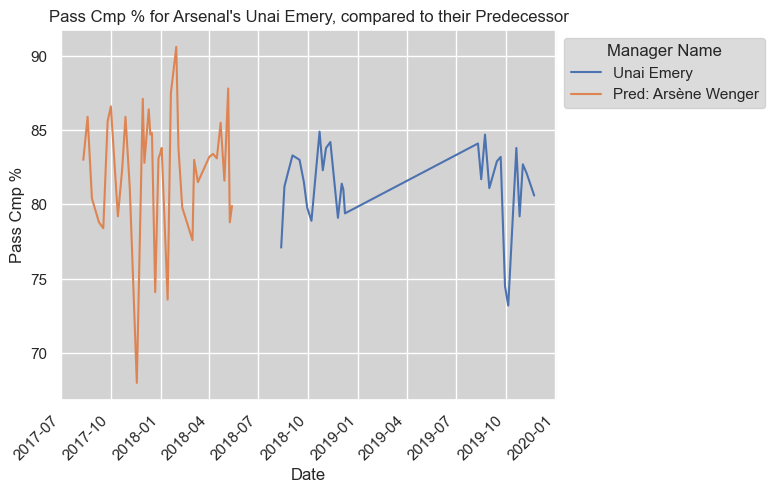

In [124]:
manager = 'Unai Emery'
team = 'Arsenal'
def graph_met_over_time(manager, team, specific_met=None):
    metrics_under_manager = (metrics_managers
                             [(metrics_managers['Manager'] == manager) 
                              & (metrics_managers['Team'] == team)])
    quant_mum = metrics_under_manager[quant_columns + ['Date']].copy()
    quant_mum['Manager Name'] = [manager] * quant_mum.shape[0]
    predecessor = metrics_under_manager['Predecessor'].unique()[0]
    if predecessor == manager:
        predecessor += '_prev'
    metrics_under_pred = (metrics_managers
                          [(metrics_managers['Manager'] == predecessor) 
                           & (metrics_managers['Team'] == team)])
    quant_mup = metrics_under_pred[quant_columns + ['Date']].copy()
    quant_mup['Manager Name'] = ['Pred: '+predecessor] * quant_mup.shape[0]
    mum_mup = pd.concat([quant_mum, quant_mup])
    print(predecessor)
    if specific_met:
        fig = sns.lineplot(data=mum_mup, x='Date', y=specific_met, hue='Manager Name')
        fig.set(title=f'{specific_met} for {team}\'s {manager}, compared to their Predecessor')
    else:
        return
    sns.move_legend(fig, 'upper left', bbox_to_anchor=(1,1))
    plt.xticks(rotation=45, ha = 'right')
    return fig
graph_met_over_time(manager, team, specific_met='Pass Cmp %');

This graph tells us that for Unai Emery, the Pass Completion Rate actually dropped in relation to their predecessor.

Arsène Wenger


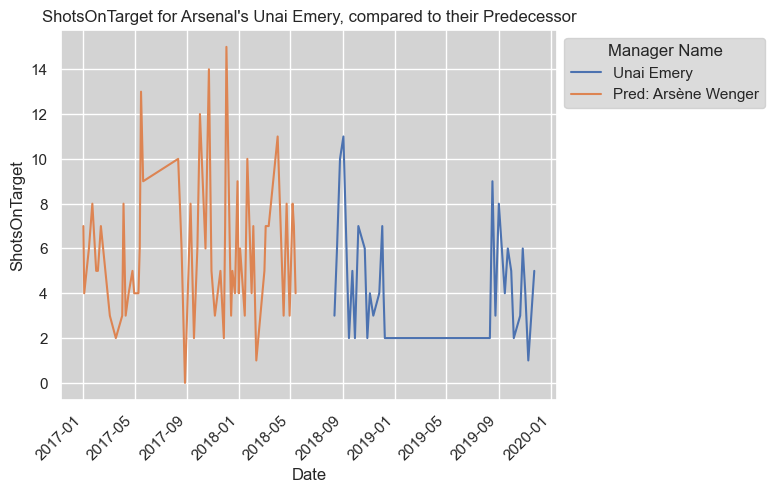

In [125]:
graph_met_over_time(manager, team, specific_met='ShotsOnTarget');

However, there was a spike in Shots on Target. We'll aggregate these positive metrics later on, weighing them all with the same weight, so that they are all taken into account in our analysis.

### Step 3: Calculating average metrics for the first 10 games
Moving onto the next step, let's pick a manager and team and calculate the metrics for their first 10 games. We want to make sure the manager we pick has a predecessor with data in our dataset- otherwise, there's nothing to compare them to.

Southampton Mark Hughes
Mauricio Pellegrino


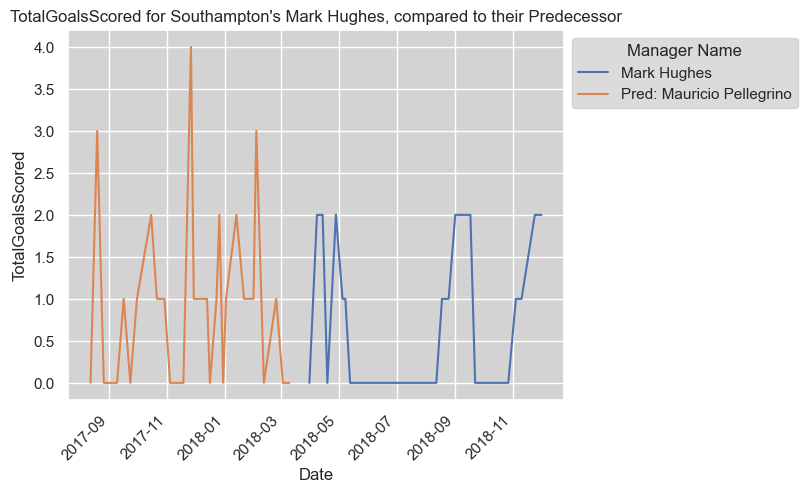

In [126]:
team = 'Southampton'
manager = 'Mark Hughes'
print(team, manager)
graph_met_over_time(manager, team, specific_met='TotalGoalsScored');
plt.show()

For the next two steps, we'll work with Southampton's Mark Hughes, comparing him with his predecessor, Mauricio Pellegrino.

First off, we want to calculate Mark's metrics for his first 10 games. To do this, we'll distill all our metrics down to three values, the Positive Metric Aggregate, the Negative Metric Aggregate, and the Points Won By Result. How these are calculate, along with the reasons for each decision, is outlined below:
1. Standardize all quantitative metrics based on Southampton's mean and std
    - This is so our metrics don't have higher influence depending on the units. For example, Pass Cmp % right now has higher raw values than any other column, since it stores percents that range from 0 to 100.
    - Doing this process by team also ensures that we're comparing scores within the scope of the team, not in the overall League.
    - We'll apply the following formula to each value in every quantitative column:
    $$\text{new value}=\frac{\text{old value} - \text{column mean}}{\text{column std}}$$
2. Take the mean of the means of all positively weighted columns to get the Positive Metric Aggregate (PMA), and do the same to the negatively weighted columns to get the Negative Metric Aggregate (NMA)
    - This aggregation of the positive and negative columns ensures both positive and negative metrics are taken into account. Since there are more positive than negative metrics, it also avoids weighing the positive metrics higher.
    - "positive" and "negative" were determined in the EDA process based on how each metric affected the result of the game. Positive columns supported a win, and negative columns pushed the team towards a loss. They are defined as follows:

<center>

| Effect | Metrics |
| --- | --- |
| Positive |Total Goals, Shots, Shots on Target, Pass Completion, and Corners |
| Negative |Yellow Cards Earned and Fouls Committed |
</center>

3. PWBR is not used as a negative nor positive metric (since it doesn't contribute to the result, it *is* the result). As a reminder, a team earns 3 points for a win, 1 point for a draw, and 0 points for a loss. We'll average this, and use it as the third value, since the average result of their matches is ultimately on of the most important effects a manager can have.

Later on, we'll compare the PMA, NMA, and average PWBR of each manager with those of their predecessor to see if PMA and PWBR are significantly higher, and NMA is significantly lower.

With all that in mind, let's get started!


In [127]:
hughes_sh_df = metrics_managers[(metrics_managers['Manager'] == 'Mark Hughes') & (metrics_managers['Team'] == 'Southampton')]
print(hughes_sh_df.shape)
hughes_sh_df.head()

(22, 14)


,Date,TotalGoalsScored,Team,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,IsHome,Manager,Predecessor,PointsWonByResult
427,2018-03-31,0,Southampton,9,0,71.6,16,9,3,0,False,Mark Hughes,Mauricio Pellegrino,0.0
428,2018-04-08,2,Southampton,15,8,69.1,7,6,1,1,False,Mark Hughes,Mauricio Pellegrino,0.0
429,2018-04-19,0,Southampton,6,2,71.2,10,3,0,0,False,Mark Hughes,Mauricio Pellegrino,1.0
430,2018-05-05,1,Southampton,11,5,71.9,12,4,4,1,False,Mark Hughes,Mauricio Pellegrino,1.0
431,2018-05-08,1,Southampton,13,8,68.9,15,6,1,0,False,Mark Hughes,Mauricio Pellegrino,3.0


In [128]:
hughes_first10 = hughes_sh_df.sort_values('Date', ascending=True).iloc[:10]
hughes_first10.shape

(10, 14)

Now that we have the metrics for Hughes' first 10 matches, we can go through the process to calculate the PMA, NMA, and average PWBR. 

First, let's standardize the metrics, based on all of Southampton's metrics.

In [129]:
from sklearn.preprocessing import StandardScaler
sh_scaler = StandardScaler()
sh_quant_mets = metrics_managers[metrics_managers['Team'] == 'Southampton'][quant_columns]
sh_scaler.fit(sh_quant_mets)
hughes_f10_std_mets = pd.DataFrame(sh_scaler.transform(hughes_first10[quant_columns]), columns=quant_columns)
hughes_f10_std_mets.head()

,TotalGoalsScored,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,PointsWonByResult
0,-1.084256,-0.696580,-1.971202,-0.304109,1.356033,1.262226,1.135562,-0.223607,-0.852163
1,0.871876,0.494640,1.659960,-0.693224,-1.141922,0.181200,-0.467046,3.689512,-0.852163
2,0.871876,-0.498043,1.206064,-0.335238,0.523381,-0.539483,2.738169,-0.223607,-0.852163
3,-1.084256,-1.292189,-1.063412,-0.366367,-0.309271,-0.899825,-1.268349,-0.223607,-0.028249
4,0.871876,0.296103,0.752169,-0.677660,0.245831,-0.179141,2.738169,-0.223607,1.619581


Then, we'll use these standardized metrics to calculate our positive/negative scores. We'll also calculate the avg PWBR here.

In [130]:
positive_metrics = ['TotalGoalsScored', 'Shots', 'ShotsOnTarget', 'Pass Cmp %', 'Corners']
negative_metrics = ['FoulsCommited', 'YellowCardsEarned']
hughes_f10_pma = hughes_f10_std_mets[positive_metrics].mean().mean()
hughes_f10_nma = hughes_f10_std_mets[negative_metrics].mean().mean()
hughes_f10_pwbr = hughes_f10_std_mets['PointsWonByResult'].mean()
print("Hughes' PMA:", hughes_f10_pma)
print("Hughes' NMA:", hughes_f10_nma)
print("Hughes' Average PWBR:", hughes_f10_pwbr)

Hughes' PMA: -0.2026613365710534
Hughes' NMA: 0.6121331267111735
Hughes' Average PWBR: -0.11064000702262042


These scores alone tell us that Hughes seems to have underperformed as a manager by Southampton standards, since his PMA and PWBR are lower than the average, and his NMA is higher. However, it *doesn't* tell us anything about his bounce: we have to compare his scores to that of his predecessor to get that.

## Step 4: Comparing to the Predecessor
First we have to find the metrics for his predecessor, Mauricio Pellegrino.

In [131]:
pelle_sh_df = metrics_managers[(metrics_managers['Manager'] == 'Mauricio Pellegrino') & (metrics_managers['Team'] == 'Southampton')]
print(pelle_sh_df.shape)
pelle_sh_df.head()

(30, 14)


,Date,TotalGoalsScored,Team,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,IsHome,Manager,Predecessor,PointsWonByResult
413,2017-08-26,0,Southampton,6,3,75.5,10,4,1,0,False,Mauricio Pellegrino,Claude Puel,1.0
414,2017-09-16,1,Southampton,13,4,78.5,13,5,1,0,False,Mauricio Pellegrino,Claude Puel,3.0
415,2017-09-30,1,Southampton,21,3,83.6,10,6,2,0,False,Mauricio Pellegrino,Claude Puel,0.0
416,2017-10-29,1,Southampton,6,1,77.4,10,7,1,0,False,Mauricio Pellegrino,Claude Puel,1.0
417,2017-11-18,0,Southampton,5,0,71.0,9,2,1,0,False,Mauricio Pellegrino,Claude Puel,0.0


Now, we'll follow the same process: Standardize, then calculate scores. The good news is, we already have a scaler fit for Southampton.

In [132]:
pelle_std_mets = pd.DataFrame(sh_scaler.transform(pelle_sh_df[quant_columns]), columns=quant_columns)
pelle_std_mets.head()

,TotalGoalsScored,Shots,ShotsOnTarget,Pass Cmp %,FoulsCommited,Corners,YellowCardsEarned,RedCardsEarned,PointsWonByResult
0,-1.084256,-1.292189,-0.609516,0.302912,-0.309271,-0.539483,-0.467046,-0.223607,-0.028249
1,-0.106190,0.097567,-0.155621,0.769850,0.523381,-0.179141,-0.467046,-0.223607,1.619581
2,-0.106190,1.685859,-0.609516,1.563646,-0.309271,0.181200,0.334258,-0.223607,-0.852163
3,-0.106190,-1.292189,-1.517307,0.598639,-0.309271,0.541542,-0.467046,-0.223607,-0.028249
4,-1.084256,-1.490726,-1.971202,-0.397497,-0.586821,-1.260167,-0.467046,-0.223607,-0.852163


In [133]:
pelle_pma = pelle_std_mets[positive_metrics].mean().mean()
pelle_nma = pelle_std_mets[negative_metrics].mean().mean()
pelle_pwbr = pelle_std_mets['PointsWonByResult'].mean()
print("Pellegrino's PMA:", pelle_pma),
print("Pellegrino's NMA:", pelle_nma),
print("Pellegrino's Average PWBR:", pelle_pwbr)

Pellegrino's PMA: 0.0026866722542562282
Pellegrino's NMA: -0.13485803607109872
Pellegrino's Average PWBR: -0.0831761754921827


It seems Pellegrino actually performed a bit *better* than Hughes. We know this probably means there wasn't a significant increase in performance, but let's run the tests anyways, to make sure.

### Hypothesis Testing
Here, we'll outline the procedure for our hypothesis test. We will be testing to see if the PMA and PWBR for a new manager (in this case, Hughes) in their first 10 matches are significantly higher than those of their predecessor (in this case, Pellegrino), and if the NMA is significantly *lower*.

PMA first:
rough procedure:
- assume that the pma does not depend on whether it was hughes or pelle
- create df with all of pelle's matches and hugh's first 10
- calculate diff in pma between hughes first 10 and pelle all
- permute 'manager' column, recalculate diff in pma (repeat many times)
- see if the proportion of simulated diff pma's that are higher than hughes pma (which is our p-value) is less than 0.05
***
$H_0$: The PMA of Hughes in his first 10 matches is equal to the PMA of Pellegrino.<br>
     $\quad\text{PMA}_{Hughes}-\text{PMA}_{Pellegrino} = 0$<br>
$H_a$: The PMA of Hughes is higher than the PMA of Pellegrino.<br>
     $\quad\text{PMA}_{Hughes}-\text{PMA}_{Pellegrino} > 0$<br>

Significance level: $\alpha = 0.05$
***

In [134]:
pelle = pelle_std_mets.assign(Manager = ['AAA'] * pelle_std_mets.shape[0])
hughes = hughes_f10_std_mets.assign(Manager = ['BBB'] * hughes_f10_std_mets.shape[0])
pop = pd.concat([pelle, hughes]).reset_index(drop=True)
# pma calculation function
def pma(df):
    return df[positive_metrics].mean().mean()

# observed test stat
obs_diff_pmas = pop.groupby('Manager').apply(pma).diff().iloc[-1]
# print(obs_diff_pmas)
# simulate test stats
N = 1000
sim_diffs = []
for _ in range(N):
    pop['perm_man'] = np.random.permutation(pop['Manager'])
    sim_diff_pmas = pop.groupby('perm_man').apply(pma).diff().iloc[-1]
    sim_diffs.append(sim_diff_pmas)

# sns.histplot(sim_diffs)
# calc p-val
pma_p_val = (np.array(sim_diffs) >= obs_diff_pmas).mean()
f"The P-value was {pma_p_val}"

'The P-value was 0.825'

As can be seen, the p-value was very high, meaning we fail to reject the null. Hughes' PMA in his first 10 matches was *not* significantly higher (nor actually higher at all) than his predecessor (which makes sense: The observed difference told us Hughes' PMA was lower). 

What about the other stats, NMA and PWBR? We'll run very similar hypothesis tests for those.
***
$H_0$: The average PWBR of Hughes in his first 10 matches is equal to the average PWBR of Pellegrino.<br>
     $\quad\text{PWBR}_{Hughes}-\text{PMA}_{Pellegrino} = 0$<br>
$H_a$: The average PWBR of Hughes is higher than the PWBR of Pellegrino.<br>
     $\quad\text{PWBR}_{Hughes}-\text{PWBR}_{Pellegrino} > 0$<br>

Significance level: $\alpha = 0.05$
***

In [135]:
# observed test stat
obs_diff_pwbr = pop.groupby('Manager')['PointsWonByResult'].mean().diff().iloc[-1] * -1
# print(obs_diff_pwbr)
# simulate test stats
N = 1000
sim_diffs = []
for _ in range(N):
    pop['perm_man'] = np.random.permutation(pop['Manager'])
    sim_diff_pwbr = pop.groupby('perm_man')['PointsWonByResult'].mean().diff().iloc[-1] * -1
    sim_diffs.append(sim_diff_pwbr)

# sns.histplot(sim_diffs)
# calc p-val
pwbr_p_val = (np.array(sim_diffs) >= obs_diff_pwbr).mean()
f"The P-value was {pwbr_p_val}"

'The P-value was 0.51'

***
$H_0$: The NMA of Hughes in his first 10 matches is equal to the NMA of Pellegrino.<br>
     $\quad\text{NMA}_{Hughes}-\text{NMA}_{Pellegrino} = 0$<br>
$H_a$: The NMA of Hughes is lower than the NMA of Pellegrino.<br>
     $\quad\text{NMA}_{Hughes}-\text{NMA}_{Pellegrino} < 0$<br>

Significance level: $\alpha = 0.05$
***

In [136]:
# observed test stat
def nma(df):
    return df[negative_metrics].mean().mean()
obs_diff_nma = pop.groupby('Manager').apply(nma).diff().iloc[-1]
# print(obs_diff_nma)

# simulate test stats
N = 1000
sim_diffs = []
for _ in range(N):
    pop['perm_man'] = np.random.permutation(pop['Manager'])
    sim_diff_nma = pop.groupby('perm_man').apply(nma).diff().iloc[-1]
    sim_diffs.append(sim_diff_nma)

# sns.histplot(sim_diffs)
# calc p-val
nma_p_val = (np.array(sim_diffs) <= obs_diff_nma).mean()
f"The P-value was {nma_p_val}"

'The P-value was 0.987'

In [137]:
print("PMA p-value:", pma_p_val)
print("NMA p-value:", nma_p_val)
print("PWBR p-value:", pwbr_p_val)

PMA p-value: 0.825
NMA p-value: 0.987
PWBR p-value: 0.51


Let's reflect. ALL of our p-values were (much) higher than our chosen significance level of 0.05. From this, we can determine that Hughes showed no significant improvement over Pellegrino in his first ten matches. However, this makes sense: When we looked at the PMA, NMA, and PWBR separately, they were all worse for Hughes' first 10 than for Pellegrino. So we know Hughes did *not* have a bounce. What about the other managers, for the other teams?

### Step 5: Repeat hypothesis tests for all managers, across all teams
This is the biggest step of our analysis. How many of the managers we have data on experienced a significant bounce in their metrics? To determine this, we'll have to repeat the above processes for every manager, within every team.

To make this process easier, we'll define a function that runs a permutation test given a dataframe of metrics for a single team `'df'`, a manager/predecessor name pair `'man_pred'`, and stat to calculate `'stat'`, that's either `PMA`, `NMA`, or `PWBR`. It'll go through steps 3 and 4 of our analysis for the given manager and give us the resulting p-value.

In [138]:
def manager_perm_test(df, man_pred, stat, N = 1000, showplot=False):
    """Runs a permutation test, determining if the manager/predecessor pair given had a bounce

    Args:
        df (DataFrame): df of metrics for just one team
        man_pred (tuple): (manager name, predecessor name)
        stat (str): name of statistic ('PMA', 'NMA', or 'PWBR')
        N (int, optional): Number of iterations to run. Defaults to 1000.
        showplot (bool, optional): Whether or not to display the histogram of 
            simulated test statistics. Defaults to False.
    """
    def fit_stdscaler(df):
        team_scaler = StandardScaler()
        team_quant_mets = df[quant_columns]
        team_scaler.fit(team_quant_mets)
        return sh_scaler

    def get_std_df(df, scaler, manager, first10=False):
        man_team = (df
            [(df['Manager'] == manager)]
            .sort_values('Date'))
        if man_team.empty:
            return pd.DataFrame()
        if first10:
            man_team = man_team.iloc[:10]
        man_team_std = pd.DataFrame(
            scaler.transform(man_team[quant_columns]),
            columns=quant_columns)
        return man_team_std

    def get_stat_func(stat):
        positive_metrics = ['TotalGoalsScored', 'Shots', 'ShotsOnTarget', 'Pass Cmp %', 'Corners']
        negative_metrics = ['FoulsCommited', 'YellowCardsEarned'] # remind ourselves what we're considering positive and negative
        if stat == 'PMA':
            return lambda df: df[positive_metrics].mean().mean()
        if stat == 'NMA':
            return lambda df: df[negative_metrics].mean().mean()
        if stat == 'PWBR':
            return lambda df: df['PointsWonByResult'].mean()
        raise ValueError('Invalid stat')

    manager, pred_name = man_pred
    scaler = fit_stdscaler(df)
    man_f10_std = get_std_df(df, scaler, manager, first10=True)
    pred_std = get_std_df(df, scaler, pred_name)
    if pred_std.empty:
        return 1

    pred = pred_std.assign(Manager = ['AAA'] * pred_std.shape[0])
    man = man_f10_std.assign(Manager = ['BBB'] * man_f10_std.shape[0])
    pop = pd.concat([pred, man]).reset_index(drop=True)
    func = get_stat_func(stat)

    # observed test stat
    obs_stats = pop.groupby('Manager').apply(func)
    obs_ts = obs_stats.diff().iloc[-1]
    if showplot:
        print(obs_ts)
    # simulate test stats
    sim_ts_list = []
    for _ in range(N):
        pop['perm_man'] = np.random.permutation(pop['Manager'])
        stats = pop.groupby('perm_man').apply(func)
        sim_ts = stats.diff().iloc[-1]
        sim_ts_list.append(sim_ts)

    if showplot:
        sns.histplot(sim_ts_list)
        print(sim_ts_list)
    # calc p-val
    if stat == 'NMA':
        p_val = (np.array(sim_ts_list) <= obs_ts).mean()
    else:
        p_val = (np.array(sim_ts_list) >= obs_ts).mean()
    return p_val
sh_df = metrics_managers[metrics_managers['Team'] == 'Southampton']
manager_perm_test(sh_df, ('Mark Hughes', 'Mauricio Pellegrino'), 'NMA') # Should be around 0.99

0.98

Now, we'll loop through all manager-team pairs and calculate the p-values for all of them. Let's narrow it down to one team, Southampton, for now.

In [139]:
sh_man_pred = list(zip(sh_df['Manager'].unique(), sh_df['Predecessor'].unique()))
sh_man_pred

[('Claude Puel', 'Ronald Koeman'),
 ('Ralph Hasenhüttl', 'Kelvin Davis'),
 ('Mauricio Pellegrino', 'Claude Puel'),
 ('Mark Hughes', 'Mauricio Pellegrino')]

In [140]:
p_vals = [manager_perm_test(sh_df, man_pred, 'PMA') for man_pred in sh_man_pred]
p_vals

[1, 1, 0.38, 0.794]

None of the managers in Southampton had a bounce, by the looks of it, since none of the p-values are above our significance cutoff of 0.05.

In [141]:
def get_pvals(team_df, stat):
    team_man_pred = list(zip(team_df['Manager'].unique(), team_df['Predecessor'].unique()))
    p_vals = [manager_perm_test(team_df, man_pred, stat) for man_pred in team_man_pred]
    return p_vals

### Repeating for all managers, over all teams
Now, we'll repeat what we've done for Southampton for every other team. We'll run permutation tests for every manager-predecessor pair, seeing if the PMA and PWBR have significantly increased and if the NMA has significantly decreased.

In [142]:
nma_pvals = metrics_managers.groupby('Team').apply(lambda df: get_pvals(df, 'NMA'));

In [143]:
nma_pvals_ser = nma_pvals.explode()
print(f"The proportion of managers with a significant decrease in NMA was {np.round((nma_pvals_ser <= 0.05).mean(), 2)}.")
nma_pvals_ser.sort_values().head()

The proportion of managers with a significant decrease in NMA was 0.01.


Team
Chelsea      0.019
Arsenal      0.053
Newcastle    0.067
Everton      0.087
Everton      0.095
dtype: object

From this, we can see that Chelsea had a single manager with a significant decrease in NMA (p-value < 0.05) and was the only manager to have such a result. So, only 1% of our managers had a significant decrease. Keep in mind Chelsea had the most managerial changes, and out of all of their changes, only one was significant. This is very telling, and shows that even with frequent manager changes, teams were not able to get signficant decreases in their negative metrics.

In [144]:
pma_pvals = metrics_managers.groupby('Team').apply(lambda df: get_pvals(df, 'PMA'));

In [145]:
pma_pvals_ser = pma_pvals.explode()
print(f"The proportion of managers with a significant increase in PMA was {np.round((pma_pvals_ser <= 0.05).mean(), 2)}.")
pma_pvals_ser.sort_values().head()

The proportion of managers with a significant increase in PMA was 0.04.


Team
Everton      0.001
Tottenham    0.025
Leicester     0.03
Tottenham    0.049
Newcastle    0.064
dtype: object

This output shows that Everton, Tottenham, and Leicester all had managers who achieved a significant increase in PMA in their first 10 games. While this is more significant results than NMA, this is still a relatively low number compared to the total number of manager changes (only 3%).

In [146]:
pwbr_pvals = metrics_managers.groupby('Team').apply(lambda df: get_pvals(df, 'PWBR'));

In [147]:
pwbr_pvals_ser = pwbr_pvals.explode()
print(f"The proportion of managers with significant increases in PWBR was {np.round((pwbr_pvals_ser <= 0.05).mean(), 2)}.")
pwbr_pvals_ser.sort_values().head()

The proportion of managers with significant increases in PWBR was 0.02.


Team
Leicester         0.009
West Brom          0.04
Chelsea           0.104
Crystal Palace     0.12
Tottenham         0.136
dtype: object

Finally, for PWBR, only Leicester and West Brom had managers with significant increases, which was only 2% of all managers.

## Conclusion


# Ethics & Privacy

There are many ethical concerns to address prior to performing our analysis. As far as privacy issues go, the data we used is public data that is free to use, collected from publically broadcast soccer matches and compiled on FootyStats.org.

Concerning potential biases, the data was be collected across all teams, all matches, and all seasons, and analyzed as a whole, which evens out any biases for a particular team/match/season. We intentionally avoided more advanced statistics (such as expected goals) that are calculated by other, black-box ML models, as the bias existing in these models could be compounded by our analyses. We avoided using statistics that we do not fully understand or statistics we are not able to explain. We have explored these statistics during the Exploratory Data Analysis process by team and by season to scope out any potential biases. We have also provided explanations for each statistic we use and how it is calculated in our final report, showing that we only used statistics we fully understand.

The impact of our analysis could be that teams decide to change managers less often, and that fans might manage their expectations of what might come after a manager change. However, as we have not singled out any particular team or manager in our analysis and were rather looking at an overall trend across all teams/managers, we do not expect that anyone will be unfairly affected by the results we've produced. Also, we avoided making strong claims about any particular manager and made no claims about current managers, to avoid having a negative impact on the careers of managers we've analyzed. Our report only draws a conclusion about the league as a whole, not any specific team or manager.

# Conclusion

After having done our analysis, we have come to the conclusion that **NO, there isn’t a trend in teams being more successful in the 10 games post-sacking a manager as compared to the previous reign.** This conclusion is surprising because it flies directly in the face of the prevailing belief among European football fans that a change in manager is akin to a power-up in success. Most fans are always talking about how they can at least expect some sort of short-term success just on the merits of the change alone. 

If anything, this conclusion supports the idea that clubs should be much more patient with their existing coach and try to stick by him through rough patches in form. Moreoever, this conclusion suggests that when a team is experiencing a genuine lack of success on the pitch, the club should look at revamping other, more fundamental structures (such as scouting, recruitment, investment, etc..) rather than relying on changing just one man’s job. Often times, the manager becomes the scapegoat for the team’s failures when in reality, as our conclusion supports, the actual source of the problem most likely lies elsewhere.

# Discussion

One limitation of the analysis was the fact that we only used a select sample of metrics to form these conclusions. We made the decision to limit our analysis to unbiased data that we could confirm the generation process of, to keep our analysis as objective as possible. Doing further analysis with more complex metrics might have revealed more about what managers can actually affect, such as strategy, team culture, etc.

Additionally, there can be varying reasons as to why the manager change took place in the first place, which can have an effect on the performance of the club after the switch took place. For example, a manager that was sacked probably left because of how badly a team was doing, which primes the results after the switch to improve. On the other hand, if the manager voluntarily stepped down, it might not lead to the “bounce” we are looking for, and more likely would lead to less of a performance increase. Thus, including the reason for a manager change in the analysis might have allowed us to see when exactly there would be a bounce.

Lastly, the presence of confounding variables is especially significant in a broad analysis of club performance, as there are lots of reasons why a team can do better or worse after a manager change that don’t necessarily have anything to do with the manager. Injuries, the strength of the teams they are facing, financing, and general skill level of the team all profoundly affect team performance, with or without the change of a manager. By controlling for these in further analysis, we could zero in on the effect of the manager.

# Team Contributions

- Clark Yang: Wrote code for webscraping tackle data, created presentation and wrote script
- Erich Then: Webscraped, cleaned, and did analysis for passing data; compiled analyses in conclusion
- Kabir Shergill: Wrote code to combine datasets, wrote descriptions for cleaning and analysis, summarized analyses in conclusion
- Tianqi Zhang: Handled data cleaning for the metrics dataset, wrote code for the final analysis portion, organized final report

*Everyone contributed some portion to the conclusion and presentation portion.*